In [1]:
#r "nuget:ScottPlot, 5.0.*"

Installed Packages ScottPlot, 5.0.56

Loading extensions from `C:\Users\paulf\.nuget\packages\skiasharp\2.88.9\interactive-extensions\dotnet\SkiaSharp.DotNet.Interactive.dll`

In [2]:
using Microsoft.DotNet.Interactive.Formatting;
Formatter.Register(typeof(ScottPlot.Plot), (p, w) => 
    w.Write(((ScottPlot.Plot)p).GetPngHtml(400, 300)), HtmlFormatter.MimeType);

In [3]:
// create sample data
double[] dataX = new double[] { 1, 2, 3, 4, 5 };
double[] dataY = new double[] { 1, 4, 9, 16, 25 };

// plot the data
ScottPlot.Plot plt = new();
plt.Add.Scatter(dataX, dataY);



// display the plot



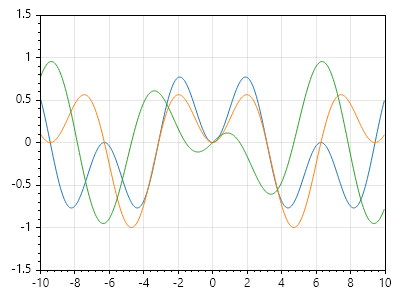

In [4]:
ScottPlot.Plot myPlot = new();

// Functions are defined as delegates with an input and output
static double func1(double x) => (Math.Sin(x) * Math.Sin(x / 2));
static double func2(double x) => (Math.Sin(x) * Math.Sin(x / 3));
static double func3(double x) => (Math.Cos(x) * Math.Sin(x / 5));



// Add functions to the plot
myPlot.Add.Function(func1);
myPlot.Add.Function(func2);
myPlot.Add.Function(func3);

// Manually set axis limits because functions do not have discrete data points
myPlot.Axes.SetLimits(-10, 10, -1.5, 1.5);

myPlot.SavePng("demo.png", 400, 300);
myPlot


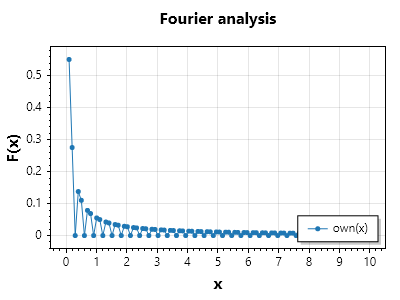

In [5]:
using ScottPlot;
using System;
using static System.Math;
int pointCount = 100;
int Harmonics=50;

// 1. Setup data arrays
double xStart = 0; 
double xEnd = 10; 
double [] x= new double[pointCount];
double [] y = new double[pointCount];
double [] own = new double[pointCount];

double step = (xEnd - xStart) / (pointCount - 1);

for (int i=0; i<pointCount; i++)
{
    x[i] = xStart + i * step;
}

// 2. Calculate Fourier series approximation of a function
for (int i = 0; i < pointCount; i++)
{
    double sum = 0;
    for (int n=1;n<Harmonics;n++)
    {
        sum +=  Cos( (Double) (2 * n) * x[i])/ ((Double) (4*n*n -1));
    }
    y[i] = (1/PI)  + 0.5 * Sin(x[i])-  (2/(PI)) * sum;
    own[i]= Abs(((2 * 1)/(PI * (Double)i)) * Sin ((Double)i * PI * (1/3.0)));
}



// 3. Plot with ScottPlot
ScottPlot.Plot plt = new ();
//var scatter = plt.Add.Scatter(x, y);
//    scatter.LegendText = "Fourier series approximation";
var scatter2 = plt.Add.Scatter(x, own);
    scatter2.LegendText = "own(x)";
//var scatter3 = plt.Add.Scatter(x, x);
//    scatter3.LegendText = "y=x";
    plt.Title("Fourier analysis");
    plt.XLabel("x");
    plt.YLabel("F(x)");

    plt.SavePng("demo.png", 400, 300);
    plt




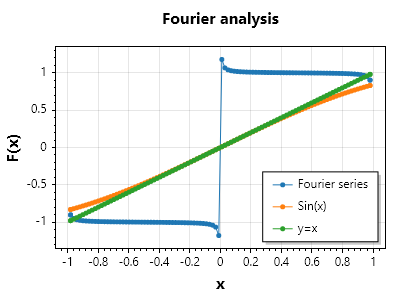

In [6]:
using ScottPlot;
using System;
using static System.Math;
int pointCount = 100;
int Harmonics=100;

// 1. Setup data arrays
double xStart = -1; 
double xEnd = 1; 
double [] x= new double[pointCount];
double [] y = new double[pointCount];
double [] sin = new double[pointCount];

double step = (xEnd - xStart) / (pointCount - 1);

for (int i=0; i<pointCount; i++)
{
    x[i] = xStart + i * step;
}

// remove the interval boundaries
x[0] = xStart + step;
x[pointCount - 1] = xEnd - step;

// 2. Calculate Fourier series approximation of a function
for (int i = 0; i < pointCount; i++)
{
    double sum = 0;
    for (int n=1;n<Harmonics;n++)
    {
        sum +=  (2* (1-(Pow(-1,n))) / (n *PI)) * Sin( (Double) (PI * n) * x[i]); 
    }
    y[i] =  sum;
    sin[i]= Sin(x[i]);
}



// 3. Plot with ScottPlot
ScottPlot.Plot plt = new ();
var scatter = plt.Add.Scatter(x, y);
    scatter.LegendText = "Fourier series";
var scatter2 = plt.Add.Scatter(x, sin);
    scatter2.LegendText = "Sin(x)";
var scatter3 = plt.Add.Scatter(x, x);
    scatter3.LegendText = "y=x";
    plt.Title("Fourier analysis");
    plt.XLabel("x");
    plt.YLabel("F(x)");

    plt.SavePng("demo.png", 800, 600);
    plt




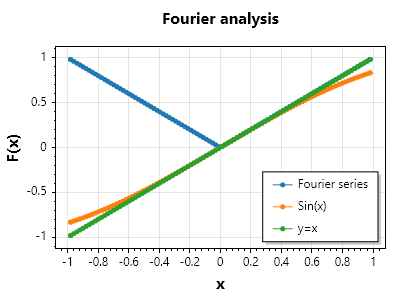

In [7]:
using ScottPlot;
using System;
using static System.Math;
int pointCount = 100;
int Harmonics=100;

// 1. Setup data arrays
double xStart = -1; 
double xEnd = 1; 
double [] x= new double[pointCount];
double [] y = new double[pointCount];
double [] sin = new double[pointCount];

double step = (xEnd - xStart) / (pointCount - 1);

for (int i=0; i<pointCount; i++)
{
    x[i] = xStart + i * step;
}

// remove the interval boundaries
x[0] = xStart + step;
x[pointCount - 1] = xEnd - step;

// 2. Calculate Fourier series approximation of a function
for (int i = 0; i < pointCount; i++)
{
    double sum = 0;
    for (int n=1;n<Harmonics;n++)
    {
         sum +=  4 / Pow((2*n-1)*PI,2) * Cos( (Double) (PI * ((2 *n) -1)  * x[i])); 
    }
    y[i] =  0.5-sum;
    sin[i]= Sin(x[i]);
}



// 3. Plot with ScottPlot
ScottPlot.Plot plt = new ();
var scatter = plt.Add.Scatter(x, y);
    scatter.LegendText = "Fourier series";
var scatter2 = plt.Add.Scatter(x, sin);
    scatter2.LegendText = "Sin(x)";
var scatter3 = plt.Add.Scatter(x, x);
    scatter3.LegendText = "y=x";
    plt.Title("Fourier analysis");
    plt.XLabel("x");
    plt.YLabel("F(x)");

    plt.SavePng("demo.png", 800, 600);
    plt



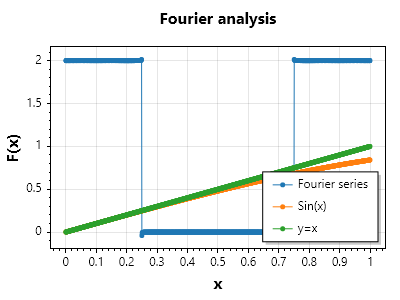

In [8]:
using ScottPlot;
using System;
using static System.Math;
int pointCount = 1000;
int Harmonics=10000;

// 1. Setup data arrays
double xStart = 0; 
double xEnd = 1; 
double [] x= new double[pointCount];
double [] y = new double[pointCount];
double [] sin = new double[pointCount];
double A = 2.0;
double d = 0.5;
double T= xEnd - xStart;

double step = (xEnd - xStart) / (pointCount - 1);

for (int i=0; i<pointCount; i++)
{
    x[i] = xStart + i * step;
}

// remove the interval boundaries
x[0] = xStart + step;
x[pointCount - 1] = xEnd - step;

// 2. Calculate Fourier series approximation of a function
for (int i = 0; i < pointCount; i++)
{
    double sum = 0;
    for (int n=1;n<Harmonics;n++)
    {
         sum += ( (2 * A) / (n * PI)) * Sin((n * PI * d) / T)  * Cos((n * PI * 2* x[i]) / T);
    }
    y[i]= (A * d) / T  + sum;
    sin[i]= Sin(x[i]);
}



// 3. Plot with ScottPlot
ScottPlot.Plot plt = new ();
var scatter = plt.Add.Scatter(x, y);
    scatter.LegendText = "Fourier series";
var scatter2 = plt.Add.Scatter(x, sin);
    scatter2.LegendText = "Sin(x)";
var scatter3 = plt.Add.Scatter(x, x);
    scatter3.LegendText = "y=x";
    plt.Title("Fourier analysis");
    plt.XLabel("x");
    plt.YLabel("F(x)");

    plt.SavePng("demo.png", 800, 600);
    plt



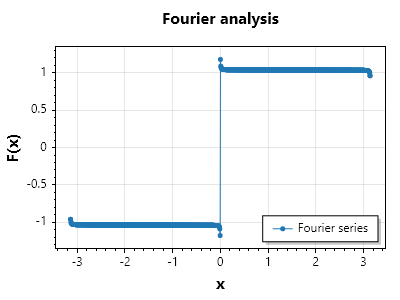

In [9]:
using ScottPlot;
using System;
using static System.Math;
int pointCount = 1000;
int Harmonics=1000;

// 1. Setup data arrays
double xStart = -PI; 
double xEnd = PI; 
double [] x= new double[pointCount];
double [] y = new double[pointCount];
double [] sin = new double[pointCount];


double step = (xEnd - xStart) / (pointCount - 1);

for (int i=0; i<pointCount; i++)
{
    x[i] = xStart + i * step;
}

// remove the interval boundaries
x[0] = xStart + step;
x[pointCount - 1] = xEnd - step;

// 2. Calculate Fourier series approximation of a function
for (int i = 0; i < pointCount; i++)
{
    double sum = 0;
    for (int n=1;n<Harmonics;n=n+2)
    {
         sum += (1 / (double) n) * Sin(n *x[i]); 
    }
    y[i]= sum + 0.25 * x[i] / Abs(x[i]);
    sin[i]= Sin(x[i]);
}



// 3. Plot with ScottPlot
ScottPlot.Plot plt = new ();
var scatter = plt.Add.Scatter(x, y);
    scatter.LegendText = "Fourier series";
//var scatter2 = plt.Add.Scatter(x, sin);
//    scatter2.LegendText = "Sin(x)";
//var scatter3 = plt.Add.Scatter(x, x);
//    scatter3.LegendText = "y=x";
    plt.Title("Fourier analysis");
    plt.XLabel("x");
    plt.YLabel("F(x)");

    plt.SavePng("demo.png", 800, 600);
    plt



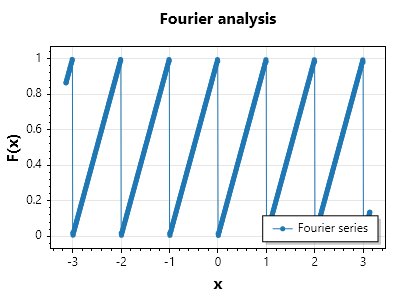

In [10]:
using ScottPlot;
using System;
using static System.Math;
int pointCount = 1000;
int Harmonics=1000;

// 1. Setup data arrays
double xStart = -PI; 
double xEnd = PI; 
double [] x= new double[pointCount];
double [] y = new double[pointCount];
double [] sin = new double[pointCount];


double step = (xEnd - xStart) / (pointCount - 1);

for (int i=0; i<pointCount; i++)
{
    x[i] = xStart + i * step;
}

// remove the interval boundaries
x[0] = xStart + step;
x[pointCount - 1] = xEnd - step;

// 2. Calculate Fourier series approximation of a function
for (int i = 0; i < pointCount; i++)
{
    double sum = 0;
    for (int n=1;n<Harmonics;n++)
    {
         sum += ((1 / ((double) n *PI))) * Sin((2 * n)  * PI *x[i]);
    }
    y[i]= 0.5 - sum; 
    sin[i]= Sin(x[i]);
}



// 3. Plot with ScottPlot
ScottPlot.Plot plt = new ();
var scatter = plt.Add.Scatter(x, y);
    scatter.LegendText = "Fourier series";
//var scatter2 = plt.Add.Scatter(x, sin);
//    scatter2.LegendText = "Sin(x)";
//var scatter3 = plt.Add.Scatter(x, x);
//    scatter3.LegendText = "y=x";
    plt.Title("Fourier analysis");
    plt.XLabel("x");
    plt.YLabel("F(x)");

    plt.SavePng("demo.png", 800, 600);
    plt


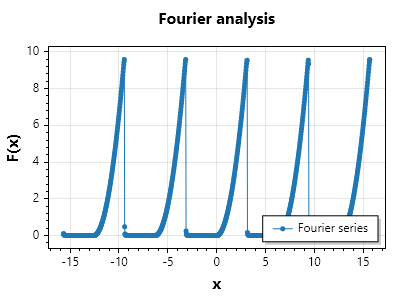

In [11]:
using ScottPlot;
using System;
using static System.Math;
int pointCount = 1000;
int Harmonics=1000;

// 1. Setup data arrays
double xStart = -5*PI; 
double xEnd = 5*PI; 
double [] x= new double[pointCount];
double [] y = new double[pointCount];
double [] sin = new double[pointCount];


double step = (xEnd - xStart) / (pointCount - 1);

for (int i=0; i<pointCount; i++)
{
    x[i] = xStart + i * step;
}

// remove the interval boundaries
x[0] = xStart + step;
x[pointCount - 1] = xEnd - step;

// 2. Calculate Fourier series approximation of a function
for (int i = 0; i < pointCount; i++)
{
    double sum = 0;
    for (int n=1;n<Harmonics;n++)
    {
         sum += ((2 * Math.Pow(-1,n)) / ((double)(n * n))) * Cos(n  *x[i]);
         sum += ( (((Math.Pow(-1,n+1)*PI) / ((double)(n))) ) +
                  (((2*Math.Pow(-1,n)-2) / ((double)(n*n*n*PI))) ))
         
                * Sin( n  *x[i]);
    }
    y[i]= ((PI*PI)/ (double) 6) + sum; 
    sin[i]= Sin(x[i]);
}



// 3. Plot with ScottPlot
ScottPlot.Plot plt = new ();
var scatter = plt.Add.Scatter(x, y);
    scatter.LegendText = "Fourier series";
//var scatter2 = plt.Add.Scatter(x, sin);
//    scatter2.LegendText = "Sin(x)";
//var scatter3 = plt.Add.Scatter(x, x);
//    scatter3.LegendText = "y=x";
    plt.Title("Fourier analysis");
    plt.XLabel("x");
    plt.YLabel("F(x)");

    plt.SavePng("demo.png", 800, 600);
    plt


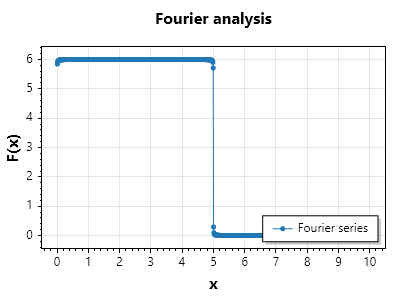

In [12]:
using ScottPlot;
using System;
using static System.Math;
int pointCount = 1000;
int Harmonics=1000;

// 1. Setup data arrays
double xStart = 0; 
double xEnd = 10; 
double [] x= new double[pointCount];
double [] y = new double[pointCount];
double [] sin = new double[pointCount];


double step = (xEnd - xStart) / (pointCount - 1);

for (int i=0; i<pointCount; i++)
{
    x[i] = xStart + i * step;
}

// remove the interval boundaries
x[0] = xStart + step;
x[pointCount - 1] = xEnd - step;

// 2. Calculate Fourier series approximation of a function
for (int i = 0; i < pointCount; i++)
{
    double sum = 0;
    for (int n=1;n<Harmonics;n++)
    {
         sum += Sin(0.2 * ((2*n)-1)  *PI * x[i])/((Double)((2*n)-1));
    }
    y[i]= 3 + (12/PI)* sum; 
    sin[i]= Sin(x[i]);
}



// 3. Plot with ScottPlot
ScottPlot.Plot plt = new ();
var scatter = plt.Add.Scatter(x, y);
    scatter.LegendText = "Fourier series";
//var scatter2 = plt.Add.Scatter(x, sin);
//    scatter2.LegendText = "Sin(x)";
//var scatter3 = plt.Add.Scatter(x, x);
//    scatter3.LegendText = "y=x";
    plt.Title("Fourier analysis");
    plt.XLabel("x");
    plt.YLabel("F(x)");

    plt.SavePng("demo.png", 800, 600);
    plt


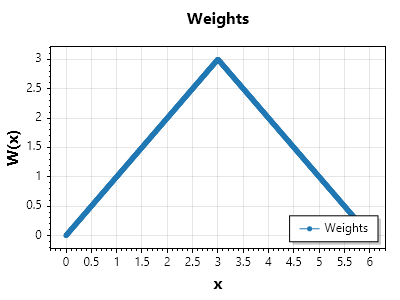

In [13]:
using ScottPlot;
using System;
using static System.Math;
int pointCount = 1000;
int Harmonics=1000;

// 1. Setup data arrays
double xStart = 0; 
double xEnd = 6; 
double [] x= new double[pointCount];
double [] y = new double[pointCount];
double [] sin = new double[pointCount];


double step = (xEnd - xStart) / (pointCount - 1);

for (int i=0; i<pointCount; i++)
{
    x[i] = xStart + i * step;
}

// remove the interval boundaries
//x[0] = xStart + step;
//x[pointCount - 1] = xEnd - step;

// 2. Calculate weight 
for (int i = 0; i < pointCount; i++)
{
    double sum = 0;
    for (int n=1;n<Harmonics;n++)
    {
         sum += Cos(( 1/(Double) 3) * ((Double)(2*n)-1)  *PI * x[i])/ 
         (Double) ((Pow((2 * n -1 ),2))*Pow(PI,2)); 
    }
    y[i]= 1.5 - 12 * sum; 
    sin[i]= Sin(x[i]);
}



// 3. Plot with ScottPlot
ScottPlot.Plot plt = new ();
var scatter = plt.Add.Scatter(x, y);
    scatter.LegendText = "Weights";
//var scatter2 = plt.Add.Scatter(x, sin);
//    scatter2.LegendText = "Sin(x)";
//var scatter3 = plt.Add.Scatter(x, x);
//    scatter3.LegendText = "y=x";
    plt.Title("Weights");
    plt.XLabel("x");
    plt.YLabel("W(x)");

    plt.SavePng("demo.png", 800, 600);
    plt


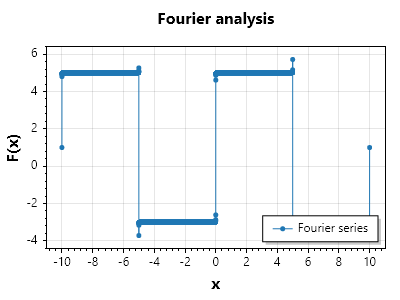

In [14]:
using ScottPlot;
using System;
using static System.Math;
int pointCount = 10000;
int Harmonics=10000;
int PeriodLength=10;
int B= -3;
int A= 5;
Double omega= (2*PI) / ((Double)   PeriodLength);

// 1. Setup data arrays
double xStart = PeriodLength; 
double xEnd = -PeriodLength; 
double [] x= new double[pointCount];
double [] y = new double[pointCount];
double [] sin = new double[pointCount];


double step = (xEnd - xStart) / (pointCount - 1);

for (int i=0; i<pointCount; i++)
{
    x[i] = xStart + i * step;
}

// remove the interval boundaries
//x[0] = xStart + step;
//x[pointCount - 1] = xEnd - step;

// 2. Calculate Fourier series approximation of a function
for (int i = 0; i < pointCount; i++)
{
    double sum = 0;
    for (int n=1;n<Harmonics;n++)
    {
        if (n % 2 == 0) continue;
         Double teller=  ((Double)(A-B))* Sin(( omega * (Double)n * x[i]));
         Double noemer= (Double) (n)*PI;

         sum += (teller/noemer); 
    }

    y[i]= 0.5 * (Double) (A+B) + (2 *(Double)sum); 
    sin[i]= Sin(x[i]);

}



// 3. Plot with ScottPlot
ScottPlot.Plot plt = new ();
var scatter = plt.Add.Scatter(x, y);
    scatter.LegendText = "Fourier series";
//var scatter2 = plt.Add.Scatter(x, sin);
//    scatter2.LegendText = "Sin(x)";
//var scatter3 = plt.Add.Scatter(x, x);
//    scatter3.LegendText = "y=x";
    plt.Title("Fourier analysis");
    plt.XLabel("x");
    plt.YLabel("F(x)");

    plt.SavePng("demo.png", 800, 600);
    plt

-1.0038848218538872



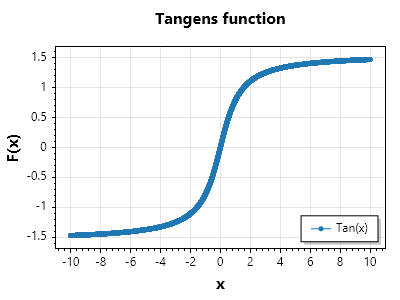

In [15]:
using ScottPlot;
using System;
using static System.Math;
int pointCount = 10000;
int Harmonics=10000;
int PeriodLength=10;
Double omega= (2*PI) / ((Double)   PeriodLength);

// 1. Setup data arrays
double xStart = PeriodLength; 
double xEnd = -PeriodLength; 
double [] x= new double[pointCount];
double [] y = new double[pointCount];
double [] atan = new double[pointCount];


double step = (xEnd - xStart) / (pointCount - 1);

for (int i=0; i<pointCount; i++)
{
    x[i] = xStart + i * step;
}

for (int i = 0; i < pointCount; i++)
{
    atan[i]= Math.Atan(x[i]);
}

Console.WriteLine(Math.Atan((Double)1/ (((Double) (-2)/(Double)PI)))); 

// 3. Plot with ScottPlot
ScottPlot.Plot plt = new ();
var scatter2 = plt.Add.Scatter(x, atan);
    scatter2.LegendText = "Tan(x)";
    plt.Title("Tangens function");
    plt.XLabel("x");
    plt.YLabel("F(x)");

    plt.SavePng("demo.png", 800, 600);
    plt


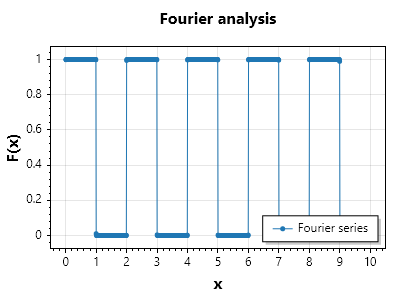

In [16]:
using ScottPlot;
using System;
using static System.Math;
int pointCount = 1000;
int Harmonics=10000;
double T=2;
double A=1;
double B=0;

// 1. Setup data arrays
double xStart = 0; 
double xEnd = 10; 
double [] x= new double[pointCount];
double [] y = new double[pointCount];
double [] sin = new double[pointCount];


double step = (xEnd - xStart) / (pointCount - 1);

for (int i=0; i<pointCount; i++)
{
    x[i] = xStart + i * step;
}

// remove the interval boundaries
x[0] = xStart + step;
x[pointCount - 1] = xEnd - step;

// 2. Calculate Fourier series approximation of a function
for (int i = 0; i < pointCount; i++)
{
    double sum = 0;
    for (int n=1;n<Harmonics;n++)
    {
         if (n % 2 == 0) continue;
         sum += ((2*(Abs(A)+Abs(B)))/((Double)n *PI)) * Sin((2.0/T) * n *PI * x[i]); 
    }
    y[i]= 0.5*(A-B) + sum; 
    sin[i]= Sin(x[i]);
}



// 3. Plot with ScottPlot
ScottPlot.Plot plt = new ();
var scatter = plt.Add.Scatter(x, y);
    scatter.LegendText = "Fourier series";
//var scatter2 = plt.Add.Scatter(x, sin);
//    scatter2.LegendText = "Sin(x)";
//var scatter3 = plt.Add.Scatter(x, x);
//    scatter3.LegendText = "y=x";
    plt.Title("Fourier analysis");
    plt.XLabel("x");
    plt.YLabel("F(x)");

    plt.SavePng("demo.png", 800, 600);
    plt


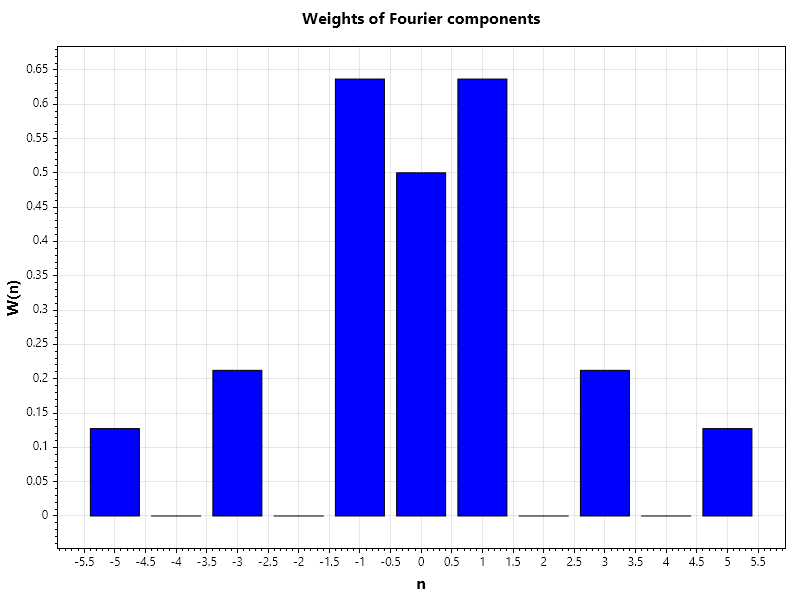


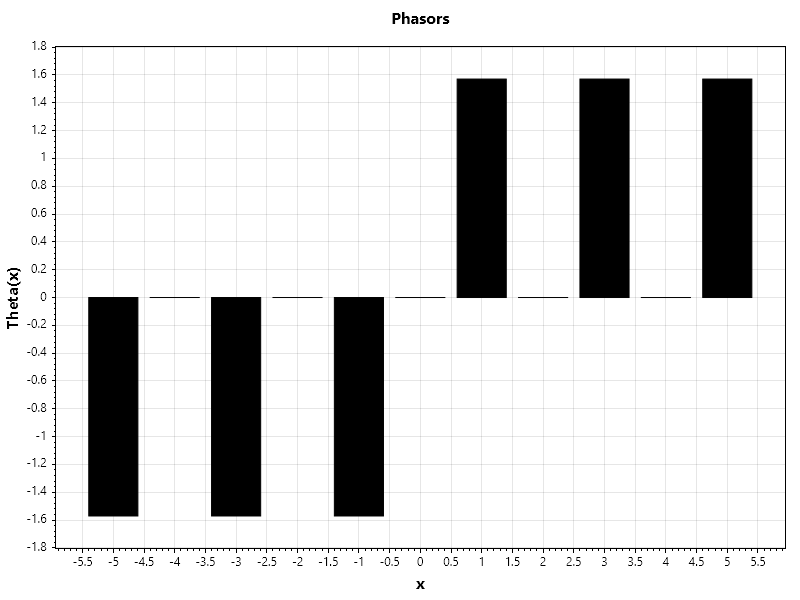

In [17]:
using ScottPlot;
using System;
using static System.Math;
using Microsoft.DotNet.Interactive;
using Microsoft.DotNet.Interactive.Formatting;

Formatter.Register<byte[]>(
    (bytes, writer) =>
    {
        var base64 = Convert.ToBase64String(bytes);
        writer.Write($"<img src=\"data:image/png;base64,{base64}\" />");
    },
    HtmlFormatter.MimeType);


// 1. Setup data arrays
int x2Start = -5; 
int x2End = 5; 
int ArrayLength=Abs(x2End - x2Start)+1;
double [] xf= new double[ArrayLength];
double [] yf = new double[ArrayLength];
double [] xp= new double[ArrayLength];
double [] yp = new double[ArrayLength];
int step=1;

for (int i=0; i<ArrayLength; i++)
{
    xf[i] = x2Start + i * step;    
    xp[i] = x2Start + i * step;
}


// 2. Calculate weights 
for (int i = 0; i < ArrayLength; i++)
{

    int n=x2Start+i;
    if (n % 2 == 0) 
    {
        if (n==0)
        {
            yf[i]=0.5;
        }
        else
        {
            yf[i]=0;
        }
    } 
    else 
    {
        yf[i]=2.0/(PI*(Double)Abs(n));
    }
}


// 3. Calculate phase
for (int i = 0; i < ArrayLength; i++)
{

    int n=x2Start+i;
    if (n % 2 == 0) 
    {
        if (n==0)
        {
            yp[i]=0;
        }
        else
        {
            yp[i]=0;
        }
    } 
    else 
    {
        if (n>0)
            yp[i]= 0.5*PI; 
        else    
            yp[i]=-0.5*PI ;
    }
}




// 3. Plot with ScottPlot
ScottPlot.Plot plt3 = new ();
var bars3 = plt3.Add.Bars(xf, yf);
bars3.Color = ScottPlot.Colors.Blue;
plt3.Title("Weights of Fourier components");
plt3.XLabel("n");
plt3.YLabel("W(n)");
plt3.SavePng("weights.png", 800, 600);
var bytesw = System.IO.File.ReadAllBytes("weights.png");
display(bytesw);


ScottPlot.Plot plt2 = new ();
var bars2 = plt2.Add.Bars(xp, yp);
bars2.Color = ScottPlot.Colors.Black;
plt2.Title("Phasors");
plt2.XLabel("x");
plt2.YLabel("Theta(x)");
plt2.SavePng("phasors.png", 800, 600);
var bytesp = System.IO.File.ReadAllBytes("phasors.png");
display(bytesp);







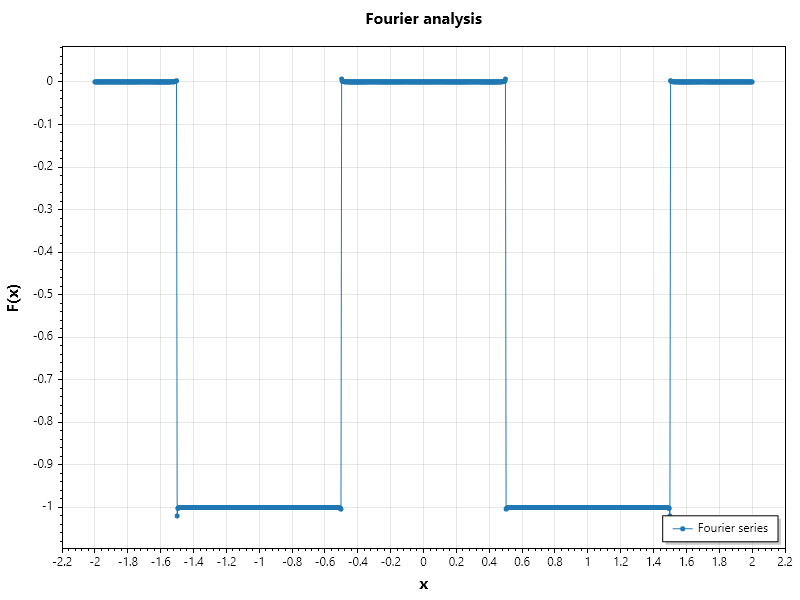


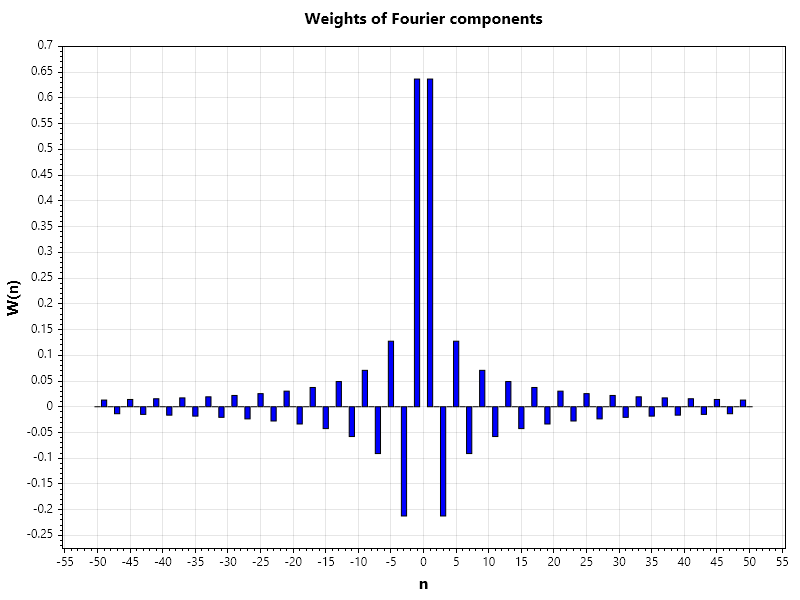


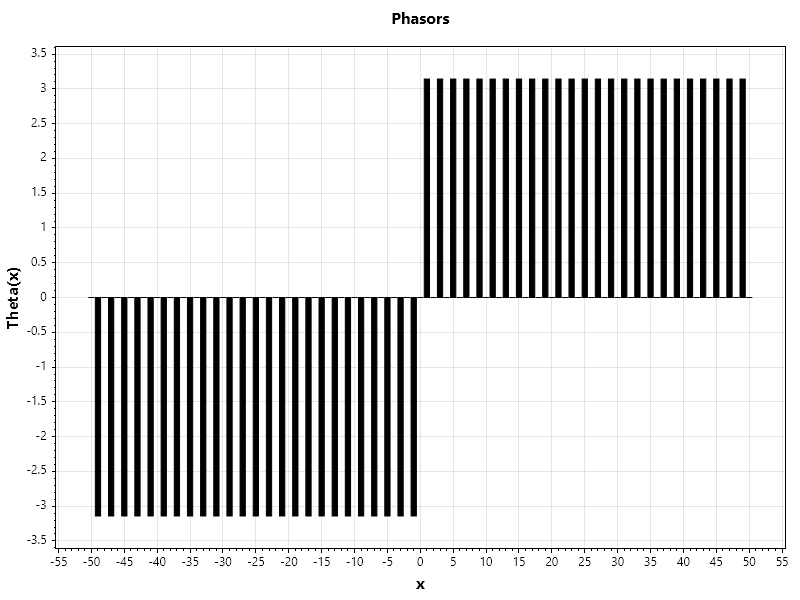

In [18]:
using ScottPlot;
using System;
using static System.Math;
using Microsoft.DotNet.Interactive;
using Microsoft.DotNet.Interactive.Formatting;

Formatter.Register<byte[]>(
    (bytes, writer) =>
    {
        var base64 = Convert.ToBase64String(bytes);
        writer.Write($"<img src=\"data:image/png;base64,{base64}\" />");
    },
    HtmlFormatter.MimeType);


int pointCount = 1000;
int Harmonics=10000;
double T=2;
double A=-1;
double B=0;

// 1. Setup data arrays
double xStart = -2; 
double xEnd = 2; 
double [] x= new double[pointCount];
double [] y = new double[pointCount];
double [] sin = new double[pointCount];


double step = (xEnd - xStart) / (pointCount - 1);

for (int i=0; i<pointCount; i++)
{
    x[i] = xStart + i * step;
}

// 2. Calculate Fourier series approximation of a function
for (int i = 0; i < pointCount; i++)
{
    double sum = 0;
    for (int n=1;n<Harmonics;n++)
    {
         sum += ((2*(Abs(A)+Abs(B))*Sin(0.5*n*PI))/((Double)n *PI)) * Cos((2.0/T) * n *PI * x[i]); 
    }
    y[i]= 0.5*(A-B) + sum; 
    sin[i]= Sin(x[i]);
}



// 3. Plot with ScottPlot
ScottPlot.Plot plt = new ();
var scatter = plt.Add.Scatter(x, y);
scatter.LegendText = "Fourier series";
plt.Title("Fourier analysis");
plt.XLabel("x");
plt.YLabel("F(x)");
plt.SavePng("fourier.png", 800, 600);
var bytesp = System.IO.File.ReadAllBytes("fourier.png");
display(bytesp);

// 1. Setup data arrays
int x2Start = -50; 
int x2End = 50; 
int ArrayLength=Abs(x2End - x2Start)+1;
double [] xf= new double[ArrayLength];
double [] yf = new double[ArrayLength];
double [] xp= new double[ArrayLength];
double [] yp = new double[ArrayLength];
step=1;

for (int i=0; i<ArrayLength; i++)
{
    xf[i] = x2Start + i * step;    
    xp[i] = x2Start + i * step;
}


// 2. Calculate weights 
for (int i = 0; i < ArrayLength; i++)
{
    int n=x2Start+i;
    yf[i]=((2*(Abs(A)+Abs(B))*Sin(0.5*n*PI))/((Double)n *PI));
}

// 3. Calculate phase
for (int i = 0; i < ArrayLength; i++)
{

    int n=x2Start+i;
    if (n % 2 == 0) 
    {
        yp[i]=0;   
    } 
    else 
    {
        yp[i]=(n % 2) *PI ;
    }
}




// 3. Plot with ScottPlot
ScottPlot.Plot plt3 = new ();
var bars3 = plt3.Add.Bars(xf, yf);
bars3.Color = ScottPlot.Colors.Blue;
plt3.Title("Weights of Fourier components");
plt3.XLabel("n");
plt3.YLabel("W(n)");
plt3.SavePng("weights.png", 800, 600);
var bytesw = System.IO.File.ReadAllBytes("weights.png");
display(bytesw);


ScottPlot.Plot plt2 = new ();
var bars2 = plt2.Add.Bars(xp, yp);
bars2.Color = ScottPlot.Colors.Black;
plt2.Title("Phasors");
plt2.XLabel("x");
plt2.YLabel("Theta(x)");
plt2.SavePng("phasors.png", 800, 600);
var bytesp2 = System.IO.File.ReadAllBytes("phasors.png");
display(bytesp2);




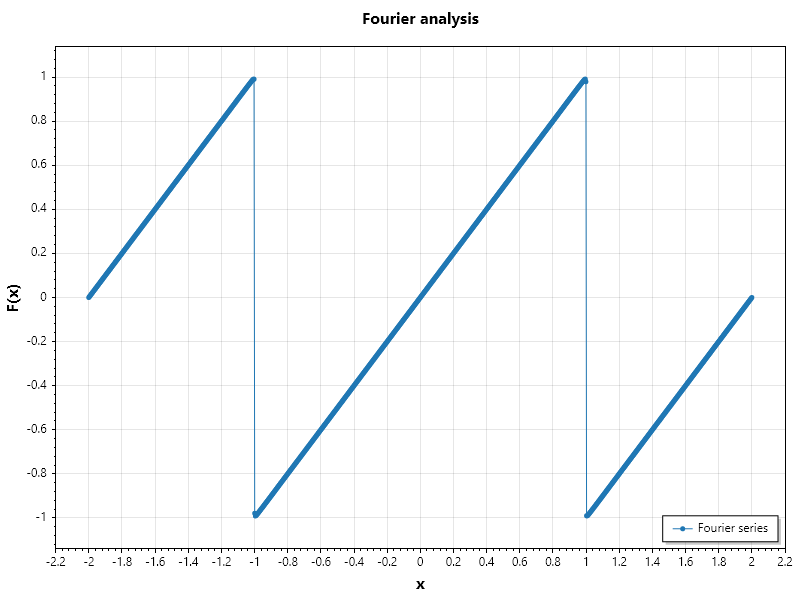


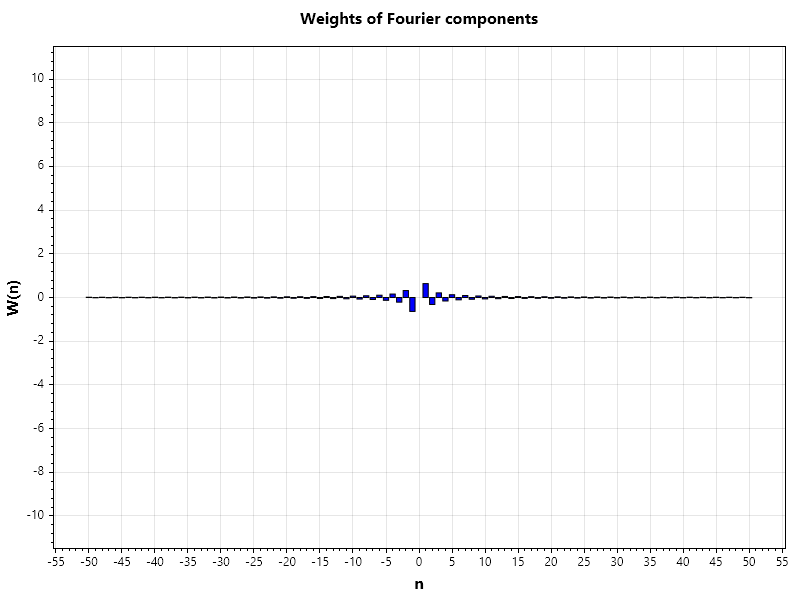


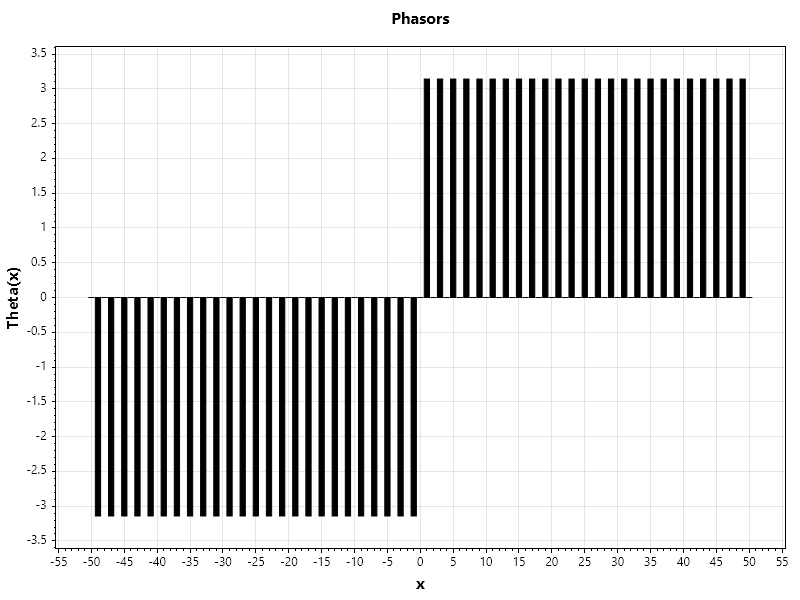

In [19]:
using ScottPlot;
using System;
using static System.Math;
using Microsoft.DotNet.Interactive;
using Microsoft.DotNet.Interactive.Formatting;

Formatter.Register<byte[]>(
    (bytes, writer) =>
    {
        var base64 = Convert.ToBase64String(bytes);
        writer.Write($"<img src=\"data:image/png;base64,{base64}\" />");
    },
    HtmlFormatter.MimeType);


int pointCount = 1000;
int Harmonics=10000;
double T=2;
double A=-1;
double B=0;

// 1. Setup data arrays
double xStart = -2; 
double xEnd = 2; 
double [] x= new double[pointCount];
double [] y = new double[pointCount];
double [] sin = new double[pointCount];


double step = (xEnd - xStart) / (pointCount - 1);

for (int i=0; i<pointCount; i++)
{
    x[i] = xStart + i * step;
}

// 2. Calculate Fourier series approximation of a function
for (int i = 0; i < pointCount; i++)
{
    double sum = 0;
    for (int n=1;n<Harmonics;n++)
    {
         sum += (2*Pow(-1,n+1)/((Double)n *PI)) * Sin( n *PI * x[i]); 
    }
    y[i]=  sum; 
}



// 3. Plot with ScottPlot
ScottPlot.Plot plt = new ();
var scatter = plt.Add.Scatter(x, y);
scatter.LegendText = "Fourier series";
plt.Title("Fourier analysis");
plt.XLabel("x");
plt.YLabel("F(x)");
plt.SavePng("fourier.png", 800, 600);
var bytesp = System.IO.File.ReadAllBytes("fourier.png");
display(bytesp);

// 1. Setup data arrays
int x2Start = -50; 
int x2End = 50; 
int ArrayLength=Abs(x2End - x2Start)+1;
double [] xf= new double[ArrayLength];
double [] yf = new double[ArrayLength];
double [] xp= new double[ArrayLength];
double [] yp = new double[ArrayLength];
step=1;

for (int i=0; i<ArrayLength; i++)
{
    xf[i] = x2Start + i * step;    
    xp[i] = x2Start + i * step;
}


// 2. Calculate weights 
for (int i = 0; i < ArrayLength; i++)
{
    int n=x2Start+i;
    yf[i]=(2*Pow(-1,n+1)/((Double)n *PI));
}

// 3. Calculate phase
for (int i = 0; i < ArrayLength; i++)
{

    int n=x2Start+i;
    if (n % 2 == 0) 
    {
        yp[i]=0;   
    } 
    else 
    {
        yp[i]=(n % 2) *PI ;
    }
}




// 3. Plot with ScottPlot
ScottPlot.Plot plt3 = new ();
var bars3 = plt3.Add.Bars(xf, yf);
bars3.Color = ScottPlot.Colors.Blue;
plt3.Title("Weights of Fourier components");
plt3.XLabel("n");
plt3.YLabel("W(n)");
plt3.SavePng("weights.png", 800, 600);
var bytesw = System.IO.File.ReadAllBytes("weights.png");
display(bytesw);


ScottPlot.Plot plt2 = new ();
var bars2 = plt2.Add.Bars(xp, yp);
bars2.Color = ScottPlot.Colors.Black;
plt2.Title("Phasors");
plt2.XLabel("x");
plt2.YLabel("Theta(x)");
plt2.SavePng("phasors.png", 800, 600);
var bytesp2 = System.IO.File.ReadAllBytes("phasors.png");
display(bytesp2);




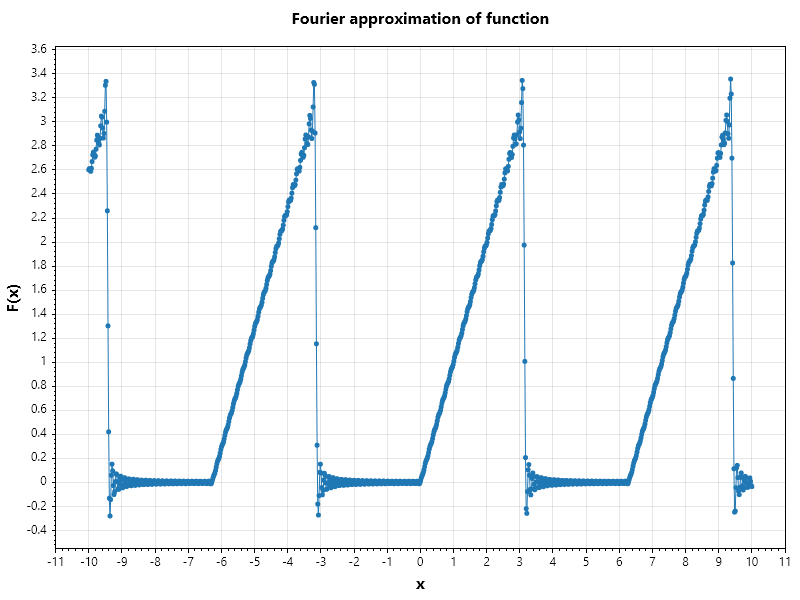


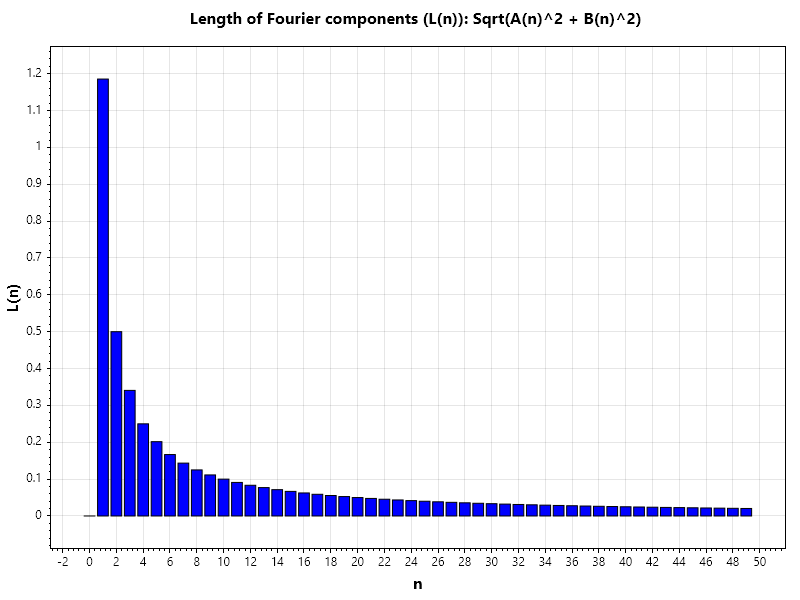


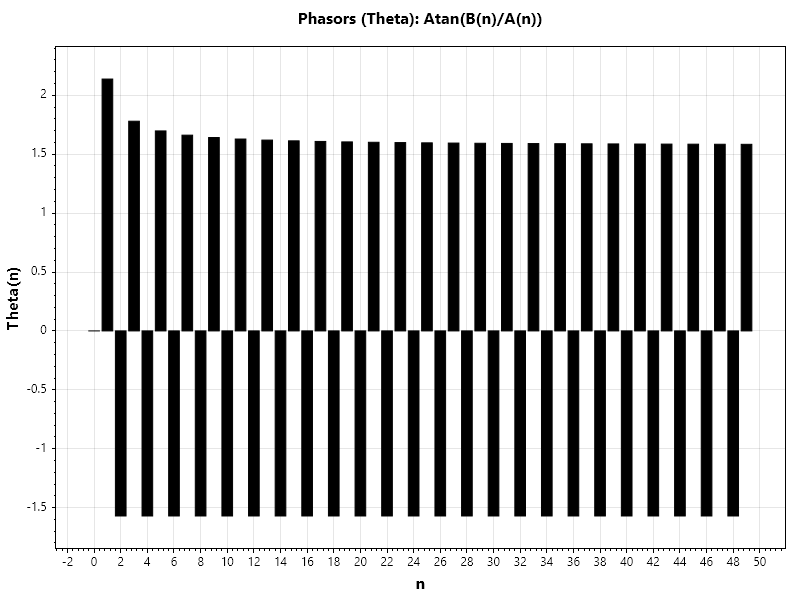

In [20]:
// for each new function repeat the code below

pointCount = 1000;   // number of points to plot 
Harmonics=50;     // number of Fourier components 

T=2.0 *PI;           // period of function
A=-1.0;              // min y-value of function
B=0.0;               // max y-value of function
xStart = -10.0;       // for drawing: min x-value
xEnd = 10.0;          // for drawing: max x-value

// overwrite global variable because of possibly different dimensions of the arrays
double [] x= new double[pointCount];
double [] y = new double[pointCount];
double [] xn= new double[Harmonics];
double [] yf = new double[Harmonics];
double [] ypa = new double[Harmonics];
double [] ypb = new double[Harmonics];
double [] yA = new double[Harmonics];


// 1. Setup x-axis for all plots
step = (xEnd - xStart) / (pointCount - 1);
for (int i=0; i<pointCount; i++)
{
    x[i] = xStart + i * step;
}

for (int i=0; i<Harmonics; i++)
{
    xn[i] = i;    
}
yf[0]=0;
yA[0]=0;


// 2. Calculate Fourier series approximation of a function

// 2.a calculate weights and phases
for (int n=1;n<Harmonics;n++)
{
    ypa[n] = ((Pow(-1,n)-1)/((Double)(n*n) *PI)); 
    ypb[n] = (Pow(-1,n+1)/((Double)n)); 
    yf[n]= Atan2(ypb[n], ypa[n]);
    yA[n]= Sqrt( (ypa[n]*ypa[n]) + (ypb[n]*ypb[n]) );
}

// 2.b calculate Fourier series approximation
double omega = (2 * PI) / T;
for (int i = 0; i < pointCount; i++)
{
    double An = 0;
    double Bn = 0;
    
    for (int n=1;n<Harmonics;n++)
    {
         An += ypa[n] * Cos( n *omega * x[i]); 
         Bn += ypb[n] * Sin( n *omega * x[i]); 
    }
    y[i]=  (PI/4) + An + Bn; 
}


// 3. Plot with ScottPlot
ScottPlot.Plot plt = new ();
var scatter = plt.Add.Scatter(x, y);
plt.Title("Fourier approximation of function");
plt.XLabel("x");
plt.YLabel("F(x)");
plt.SavePng("fourier.png", 800, 600);
var bytesp = System.IO.File.ReadAllBytes("fourier.png");
display(bytesp);

// 3. Plot with ScottPlot
ScottPlot.Plot plt3 = new ();
var bars3 = plt3.Add.Bars(xn, yA);
bars3.Color = ScottPlot.Colors.Blue;
plt3.Title("Length of Fourier components (L(n)): Sqrt(A(n)^2 + B(n)^2) ");
plt3.XLabel("n");
plt3.YLabel("L(n)");
plt3.SavePng("Lengths.png", 800, 600);
var bytesw = System.IO.File.ReadAllBytes("Lengths.png");
display(bytesw);

ScottPlot.Plot plt2 = new ();
var bars2 = plt2.Add.Bars(xn, yf);
bars2.Color = ScottPlot.Colors.Black;
plt2.Title("Phasors (Theta): Atan(B(n)/A(n))");
plt2.XLabel("n");
plt2.YLabel("Theta(n)");
plt2.SavePng("phasors.png", 800, 600);
var bytesp2 = System.IO.File.ReadAllBytes("phasors.png");
display(bytesp2);



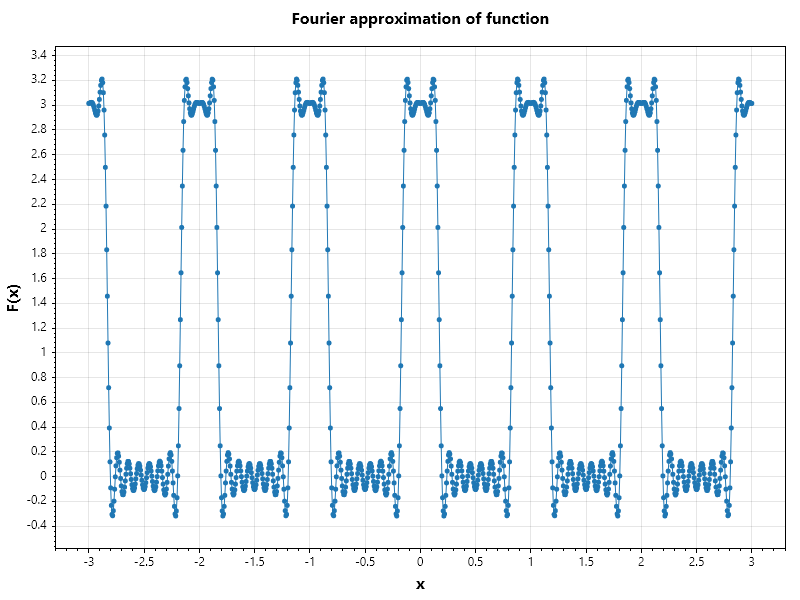


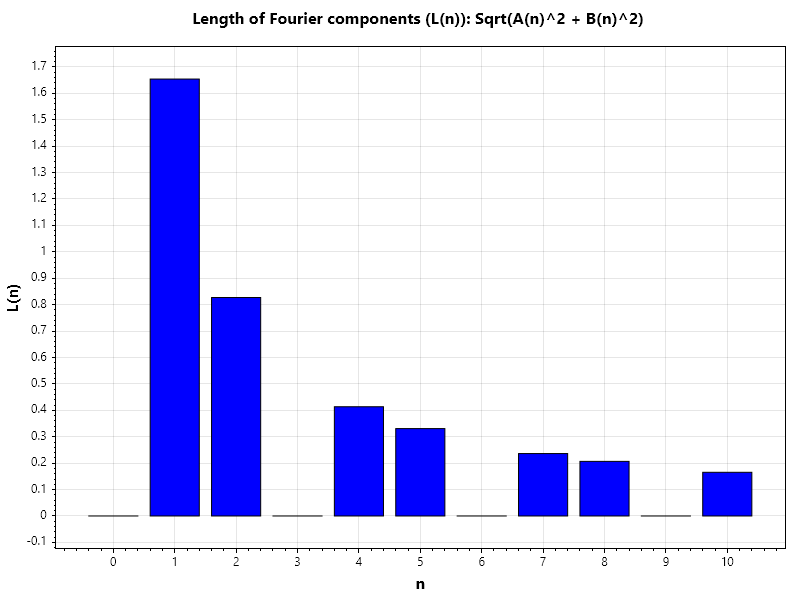


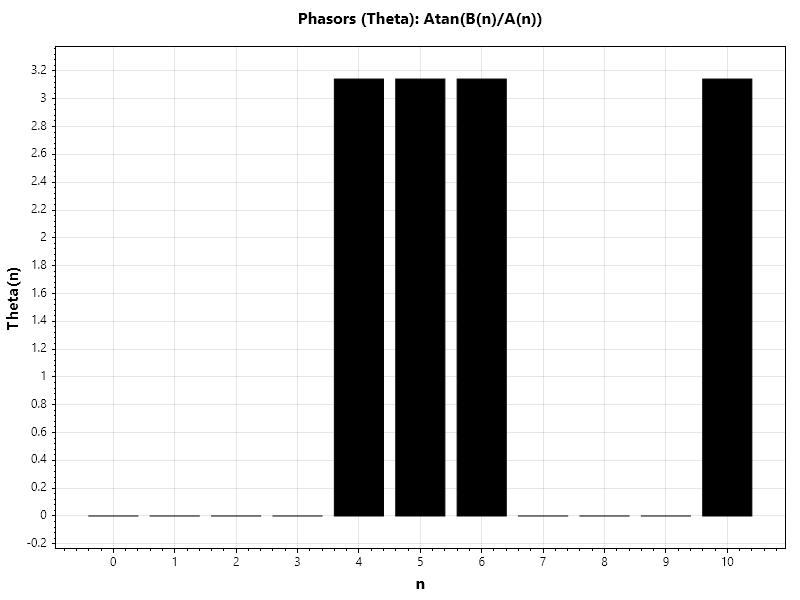

In [21]:
// for each new function repeat the code below

pointCount = 1000;   // number of points to plot 
Harmonics=11;     // number of Fourier components 

T=1;           // period of function
A=3.0;              // max y-value of function
B=0.0;               // min y-value of function
xStart = -3.0;       // for drawing: min x-value
xEnd = 3.0;          // for drawing: max x-value
double A0=A/3.0;      // average value of function

// overwrite global variable because of possibly different dimensions of the arrays
double [] x= new double[pointCount];
double [] y = new double[pointCount];
double [] xn= new double[Harmonics];
double [] yf = new double[Harmonics];
double [] ypa = new double[Harmonics];
double [] ypb = new double[Harmonics];
double [] yA = new double[Harmonics];


// 1. Setup x-axis for all plots
step = (xEnd - xStart) / (pointCount - 1);
for (int i=0; i<pointCount; i++)
{
    x[i] = xStart + i * step;
}

for (int i=0; i<Harmonics; i++)
{
    xn[i] = i;    
}
yf[0]=0;
yA[0]=0;


// 2. Calculate Fourier series approximation of a function

// 2.a calculate weights and phases
for (int n=1;n<Harmonics;n++)
{
    ypa[n] = ((2 * A)/(PI * (Double)n)) * Sin ((Double)n * PI * (1/3.0));
    ypb[n] = 0; 
    yf[n]= Atan2(ypb[n], ypa[n]);
    yA[n]= Sqrt( (ypa[n]*ypa[n]) + (ypb[n]*ypb[n]) );
}

// 2.b calculate Fourier series approximation
double omega = (2 * PI) / T;
for (int i = 0; i < pointCount; i++)
{
    double An = 0;
    double Bn = 0;
    
    for (int n=1;n<Harmonics;n++)
    {
         An += ypa[n] * Cos( n *omega * x[i]); 
         Bn += ypb[n] * Sin( n *omega * x[i]); 
    }
    y[i]=  A0 + An + Bn; 
}


// 3. Plot with ScottPlot
ScottPlot.Plot plt = new ();
var scatter = plt.Add.Scatter(x, y);
plt.Title("Fourier approximation of function");
plt.XLabel("x");
plt.YLabel("F(x)");
plt.SavePng("fourier.png", 800, 600);
var bytesp = System.IO.File.ReadAllBytes("fourier.png");
display(bytesp);

// 3. Plot with ScottPlot
ScottPlot.Plot plt3 = new ();
var bars3 = plt3.Add.Bars(xn, yA);
bars3.Color = ScottPlot.Colors.Blue;
plt3.Title("Length of Fourier components (L(n)): Sqrt(A(n)^2 + B(n)^2) ");
plt3.XLabel("n");
plt3.YLabel("L(n)");
plt3.SavePng("Lengths.png", 800, 600);
var bytesw = System.IO.File.ReadAllBytes("Lengths.png");
display(bytesw);

ScottPlot.Plot plt2 = new ();
var bars2 = plt2.Add.Bars(xn, yf);
bars2.Color = ScottPlot.Colors.Black;
plt2.Title("Phasors (Theta): Atan(B(n)/A(n))");
plt2.XLabel("n");
plt2.YLabel("Theta(n)");
plt2.SavePng("phasors.png", 800, 600);
var bytesp2 = System.IO.File.ReadAllBytes("phasors.png");
display(bytesp2);



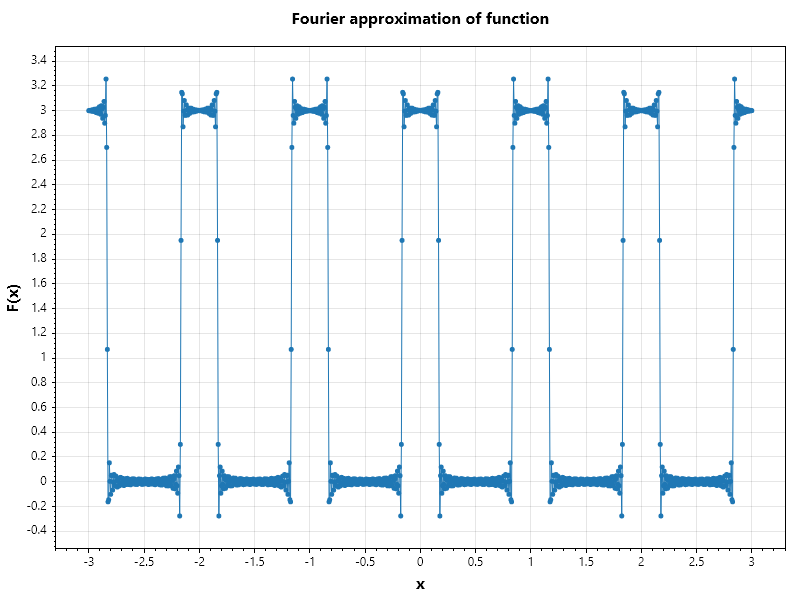


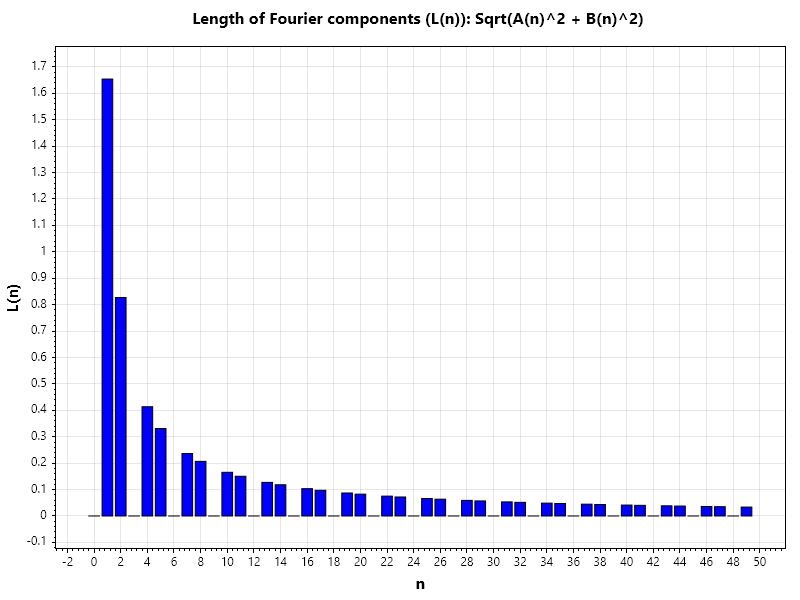


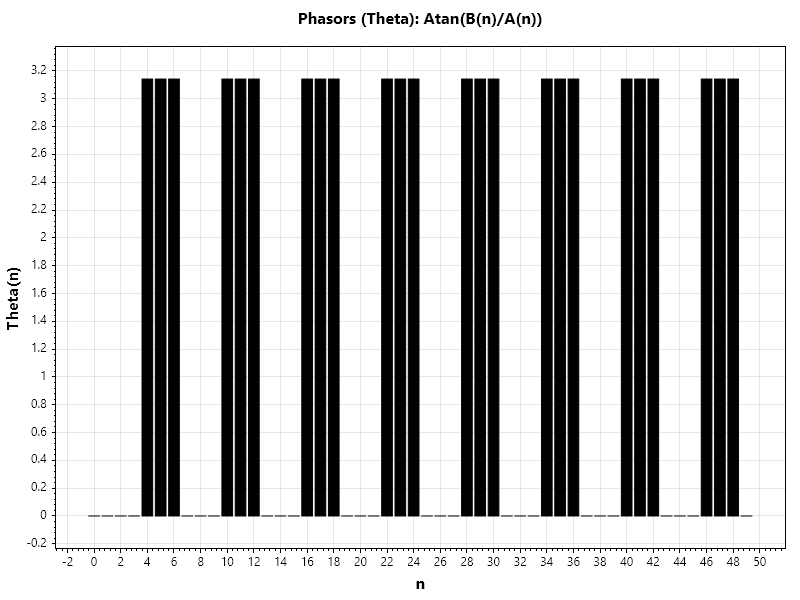

In [22]:
// for each new function repeat the code below

pointCount = 1000;   // number of points to plot 
Harmonics=50;     // number of Fourier components 

T=1;           // period of function
A=3.0;              // max y-value of function
B=0.0;               // min y-value of function
xStart = -3.0;       // for drawing: min x-value
xEnd = 3.0;          // for drawing: max x-value
double A0=A/3.0;      // average value of function

// overwrite global variable because of possibly different dimensions of the arrays
double [] x= new double[pointCount];
double [] y = new double[pointCount];
double [] xn= new double[Harmonics];
double [] yf = new double[Harmonics];
double [] ypa = new double[Harmonics];
double [] ypb = new double[Harmonics];
double [] yA = new double[Harmonics];


// 1. Setup x-axis for all plots
step = (xEnd - xStart) / (pointCount - 1);
for (int i=0; i<pointCount; i++)
{
    x[i] = xStart + i * step;
}

for (int i=0; i<Harmonics; i++)
{
    xn[i] = i;    
}
yf[0]=0;
yA[0]=0;


// 2. Calculate Fourier series approximation of a function

// 2.a calculate weights and phases
for (int n=1;n<Harmonics;n++)
{
    ypa[n] = ((2 * A)/(PI * (Double)n)) * Sin ((Double)n * PI * (1/3.0));
    ypb[n] = 0; 
    yf[n]= Atan2(ypb[n], ypa[n]);
    yA[n]= Sqrt( (ypa[n]*ypa[n]) + (ypb[n]*ypb[n]) );
}

// 2.b calculate Fourier series approximation
double omega = (2 * PI) / T;
for (int i = 0; i < pointCount; i++)
{
    double An = 0;
    double Bn = 0;
    
    for (int n=1;n<Harmonics;n++)
    {
         An += ypa[n] * Cos( n *omega * x[i]); 
         Bn += ypb[n] * Sin( n *omega * x[i]); 
    }
    y[i]=  A0 + An + Bn; 
}


// 3. Plot with ScottPlot
ScottPlot.Plot plt = new ();
var scatter = plt.Add.Scatter(x, y);
plt.Title("Fourier approximation of function");
plt.XLabel("x");
plt.YLabel("F(x)");
plt.SavePng("fourier.png", 800, 600);
var bytesp = System.IO.File.ReadAllBytes("fourier.png");
display(bytesp);

// 3. Plot with ScottPlot
ScottPlot.Plot plt3 = new ();
var bars3 = plt3.Add.Bars(xn, yA);
bars3.Color = ScottPlot.Colors.Blue;
plt3.Title("Length of Fourier components (L(n)): Sqrt(A(n)^2 + B(n)^2) ");
plt3.XLabel("n");
plt3.YLabel("L(n)");
plt3.SavePng("Lengths.png", 800, 600);
var bytesw = System.IO.File.ReadAllBytes("Lengths.png");
display(bytesw);

ScottPlot.Plot plt2 = new ();
var bars2 = plt2.Add.Bars(xn, yf);
bars2.Color = ScottPlot.Colors.Black;
plt2.Title("Phasors (Theta): Atan(B(n)/A(n))");
plt2.XLabel("n");
plt2.YLabel("Theta(n)");
plt2.SavePng("phasors.png", 800, 600);
var bytesp2 = System.IO.File.ReadAllBytes("phasors.png");
display(bytesp2);



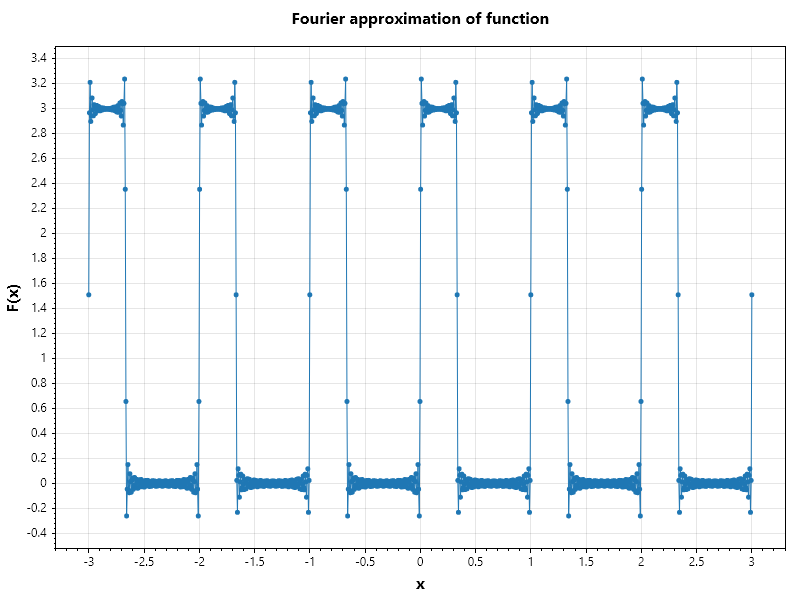


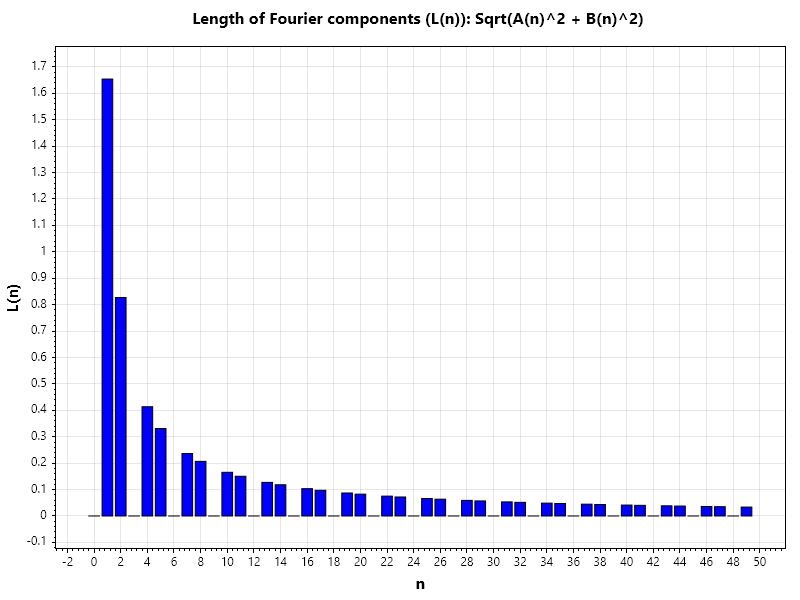


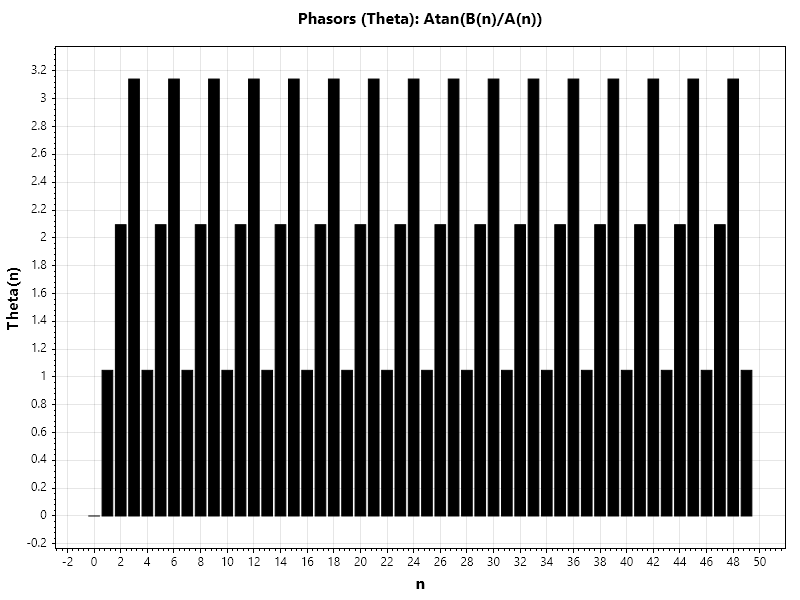

In [23]:
// for each new function repeat the code below

pointCount = 1000;   // number of points to plot 
Harmonics=50;     // number of Fourier components 

T=1;           // period of function
A=3.0;              // max y-value of function
B=0.0;               // min y-value of function
xStart = -3.0;       // for drawing: min x-value
xEnd = 3.0;          // for drawing: max x-value
double A0=A/3.0;      // average value of function

// overwrite global variable because of possibly different dimensions of the arrays
double [] x= new double[pointCount];
double [] y = new double[pointCount];
double [] xn= new double[Harmonics];
double [] yf = new double[Harmonics];
double [] ypa = new double[Harmonics];
double [] ypb = new double[Harmonics];
double [] yA = new double[Harmonics];


// 1. Setup x-axis for all plots
step = (xEnd - xStart) / (pointCount - 1);
for (int i=0; i<pointCount; i++)
{
    x[i] = xStart + i * step;
}

for (int i=0; i<Harmonics; i++)
{
    xn[i] = i;    
}
yf[0]=0;
yA[0]=0;


// 2. Calculate Fourier series approximation of a function

// 2.a calculate weights and phases
for (int n=1;n<Harmonics;n++)
{
    ypa[n] = ((-A)/(PI * (Double)n)) * Sin ((Double)n * PI * (-2.0/3.0));
    ypb[n] = ((-A)/(PI * (Double)n)) * Cos ((Double)n * PI * (-2.0/3.0)) + ((A)/(PI * (Double)n)); 
    yf[n]= Atan2(ypb[n], ypa[n]);
    yA[n]= Sqrt( (ypa[n]*ypa[n]) + (ypb[n]*ypb[n]) );
}

// 2.b calculate Fourier series approximation
double omega = (2 * PI) / T;
for (int i = 0; i < pointCount; i++)
{
    double An = 0;
    double Bn = 0;
    
    for (int n=1;n<Harmonics;n++)
    {
         An += ypa[n] * Cos( n *omega * x[i]); 
         Bn += ypb[n] * Sin( n *omega * x[i]); 
    }
    y[i]=  A0 + An + Bn; 
}


// 3. Plot with ScottPlot
ScottPlot.Plot plt = new ();
var scatter = plt.Add.Scatter(x, y);
plt.Title("Fourier approximation of function");
plt.XLabel("x");
plt.YLabel("F(x)");
plt.SavePng("fourier.png", 800, 600);
var bytesp = System.IO.File.ReadAllBytes("fourier.png");
display(bytesp);

// 3. Plot with ScottPlot
ScottPlot.Plot plt3 = new ();
var bars3 = plt3.Add.Bars(xn, yA);
bars3.Color = ScottPlot.Colors.Blue;
plt3.Title("Length of Fourier components (L(n)): Sqrt(A(n)^2 + B(n)^2) ");
plt3.XLabel("n");
plt3.YLabel("L(n)");
plt3.SavePng("Lengths.png", 800, 600);
var bytesw = System.IO.File.ReadAllBytes("Lengths.png");
display(bytesw);

ScottPlot.Plot plt2 = new ();
var bars2 = plt2.Add.Bars(xn, yf);
bars2.Color = ScottPlot.Colors.Black;
plt2.Title("Phasors (Theta): Atan(B(n)/A(n))");
plt2.XLabel("n");
plt2.YLabel("Theta(n)");
plt2.SavePng("phasors.png", 800, 600);
var bytesp2 = System.IO.File.ReadAllBytes("phasors.png");
display(bytesp2);



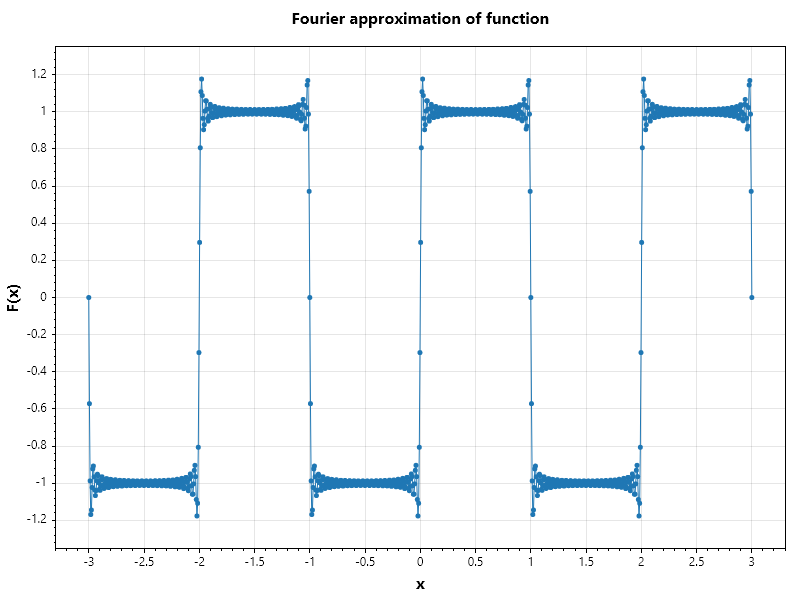


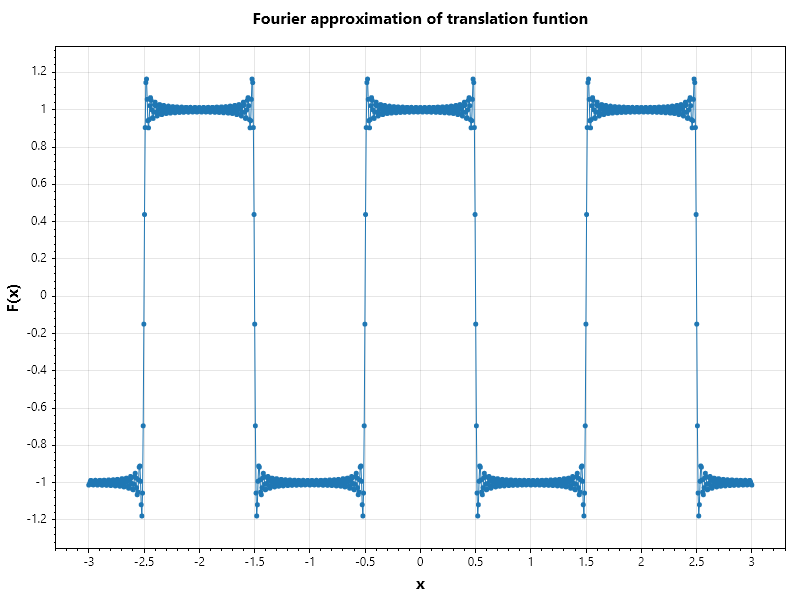


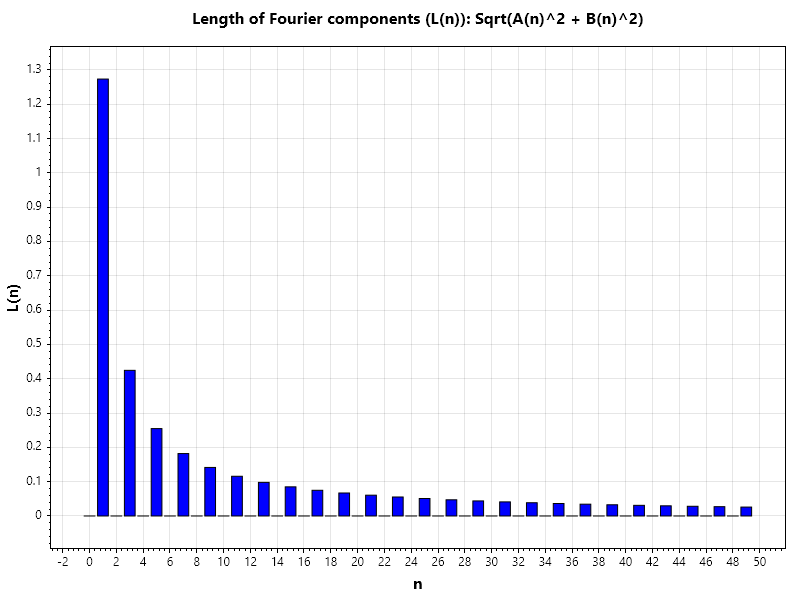


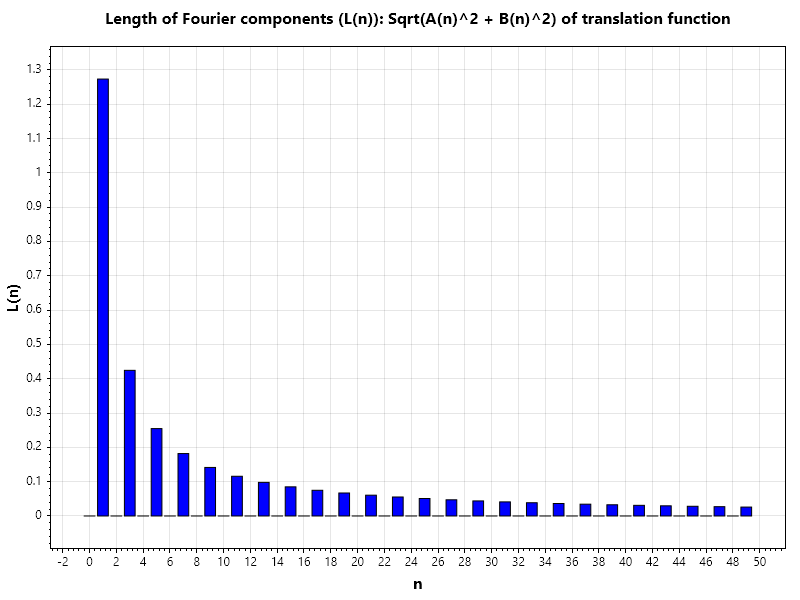


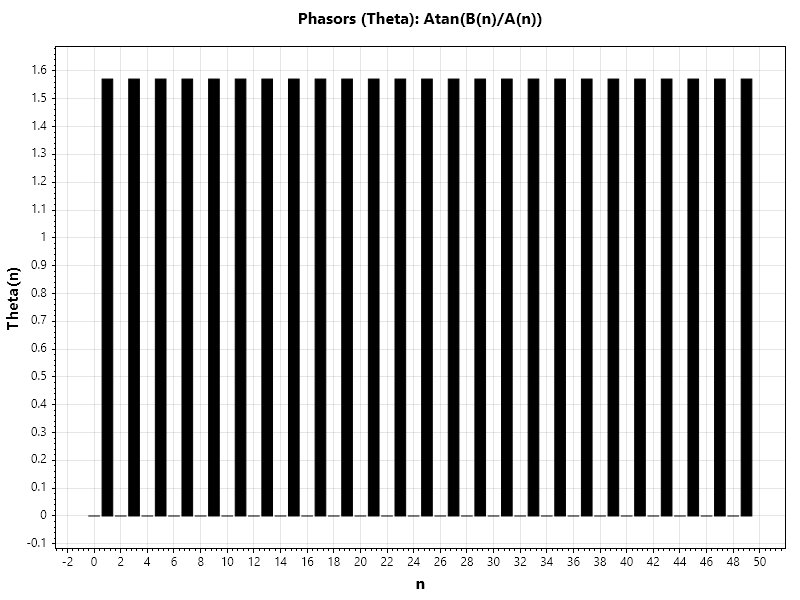


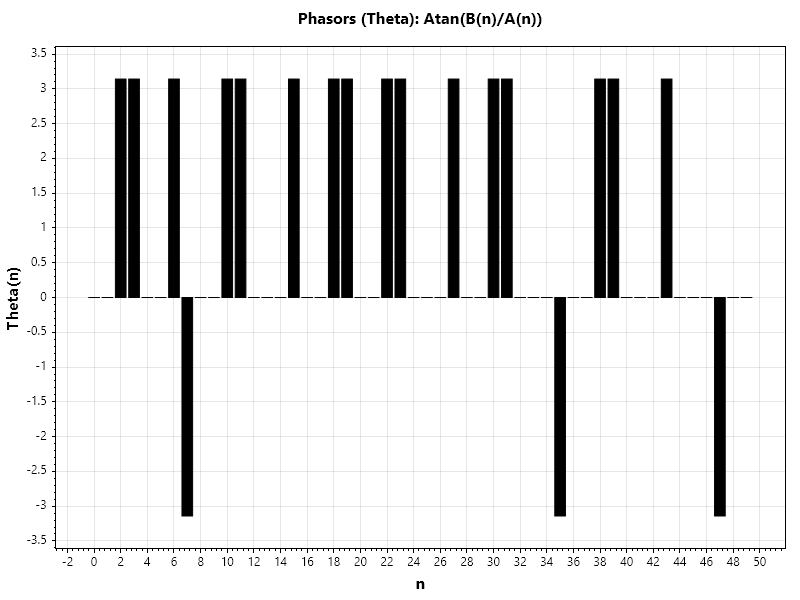

In [24]:
// for each new function repeat the code below

pointCount = 1000;   // number of points to plot 
Harmonics=50;     // number of Fourier components 

T=2;           // period of function
A=3.0;              // max y-value of function
B=0.0;               // min y-value of function
xStart = -3.0;       // for drawing: min x-value
xEnd = 3.0;          // for drawing: max x-value
double A0=0.0;      // average value of function
double omega = (2 * PI) / T;

// overwrite global variable because of possibly different dimensions of the arrays
double [] x= new double[pointCount];
double [] y = new double[pointCount];
double [] xn= new double[Harmonics];
double [] yf = new double[Harmonics];
double [] ypa = new double[Harmonics];
double [] ypb = new double[Harmonics];
double [] yA = new double[Harmonics];

double [] ypa_ = new double[Harmonics];
double [] ypb_ = new double[Harmonics];
double [] y_ = new double[pointCount];
double [] yf_ = new double[Harmonics];
double [] yA_ = new double[Harmonics];

// 1. Setup x-axis for all plots
step = (xEnd - xStart) / (pointCount - 1);
for (int i=0; i<pointCount; i++)
{
    x[i] = xStart + i * step;
}

for (int i=0; i<Harmonics; i++)
{
    xn[i] = i;    
}
yf[0]=0;
yA[0]=0;

double translation= 1.5;
// 2. Calculate Fourier series approximation of a function

// 2.a calculate weights and phases
for (int n=1;n<Harmonics;n++)
{
    ypa[n] = (( 2.0/(PI * (Double)n)) * Sin (1.0 * (Double)n * PI)) -
             (( 1.0/(PI * (Double)n)) * Sin (2.0 * (Double)n * PI)); 
    ypb[n] = ((-2.0/(PI * (Double)n)) * Cos (1.0 * (Double)n * PI)) + 
             (( 1.0/(PI * (Double)n)) * Cos (2.0 * (Double)n * PI)) +
             (  1.0/(PI * (Double)n)); 
    yf[n]= Atan2(ypb[n], ypa[n]);
    yA[n]= Sqrt( (ypa[n]*ypa[n]) + (ypb[n]*ypb[n]) );

    double factor = ((double)n * omega * translation) % (2.0 * PI);

    ypa_[n]=Cos(factor) * ypa[n] - Sin(factor) * ypb[n];
    ypb_[n]=Sin(factor) * ypa[n] + Cos(factor) * ypb[n];
    yf_[n]= Atan2(ypb_[n], ypa_[n]);
    yA_[n]= Sqrt( (ypa_[n]*ypa_[n]) + (ypb_[n]*ypb_[n]) );

}

// 2.b calculate Fourier series approximation
for (int i = 0; i < pointCount; i++)
{
    double An = 0;
    double Bn = 0;
    double An_ = 0;
    double Bn_ = 0;
    for (int n=1;n<Harmonics;n++)
    {
         An += ypa[n] * Cos( n *omega * x[i]); 
         Bn += ypb[n] * Sin( n *omega * x[i]); 
         An_ += ypa_[n] * Cos( n *omega  * x[i]); 
         Bn_ += ypb_[n] * Sin( n *omega  * x[i]);
    }
    y[i]=  A0 + An + Bn; 
    y_[i]=  A0 + An_ + Bn_;
}


// 3. Plot with ScottPlot
ScottPlot.Plot plt = new ();
var scatter = plt.Add.Scatter(x, y);
plt.Title("Fourier approximation of function");
plt.XLabel("x");
plt.YLabel("F(x)");
plt.SavePng("fourier.png", 800, 600);
var bytesp = System.IO.File.ReadAllBytes("fourier.png");
display(bytesp);

ScottPlot.Plot plt_ = new ();
var scatter_ = plt_.Add.Scatter(x, y_);
plt_.Title("Fourier approximation of translation funtion");
plt_.XLabel("x");
plt_.YLabel("F(x)");
plt_.SavePng("fourier_.png", 800, 600);
var bytesp_ = System.IO.File.ReadAllBytes("fourier_.png");
display(bytesp_);

// 3. Plot with ScottPlot
ScottPlot.Plot plt3 = new ();
var bars3 = plt3.Add.Bars(xn, yA);
bars3.Color = ScottPlot.Colors.Blue;
plt3.Title("Length of Fourier components (L(n)): Sqrt(A(n)^2 + B(n)^2)");
plt3.XLabel("n");
plt3.YLabel("L(n)");
plt3.SavePng("Lengths.png", 800, 600);
var bytesw = System.IO.File.ReadAllBytes("Lengths.png");
display(bytesw);

ScottPlot.Plot plt3_ = new ();
var bars3_ = plt3_.Add.Bars(xn, yA_);
bars3_.Color = ScottPlot.Colors.Blue;
plt3_.Title("Length of Fourier components (L(n)): Sqrt(A(n)^2 + B(n)^2) of translation function");
plt3_.XLabel("n");
plt3_.YLabel("L(n)");
plt3_.SavePng("Lengths_.png", 800, 600);
var bytesw_ = System.IO.File.ReadAllBytes("Lengths_.png");
display(bytesw_);

ScottPlot.Plot plt2 = new ();
var bars2 = plt2.Add.Bars(xn, yf);
bars2.Color = ScottPlot.Colors.Black;
plt2.Title("Phasors (Theta): Atan(B(n)/A(n))");
plt2.XLabel("n");
plt2.YLabel("Theta(n)");
plt2.SavePng("phasors.png", 800, 600);
var bytesp2 = System.IO.File.ReadAllBytes("phasors.png");
display(bytesp2);

ScottPlot.Plot plt2_ = new ();
var bars2_ = plt2_.Add.Bars(xn, yf_);
bars2_.Color = ScottPlot.Colors.Black;
plt2_.Title("Phasors (Theta): Atan(B(n)/A(n))");
plt2_.XLabel("n");
plt2_.YLabel("Theta(n)");
plt2_.SavePng("phasors_.png", 800, 600);
var bytesp2_ = System.IO.File.ReadAllBytes("phasors_.png");
display(bytesp2_);


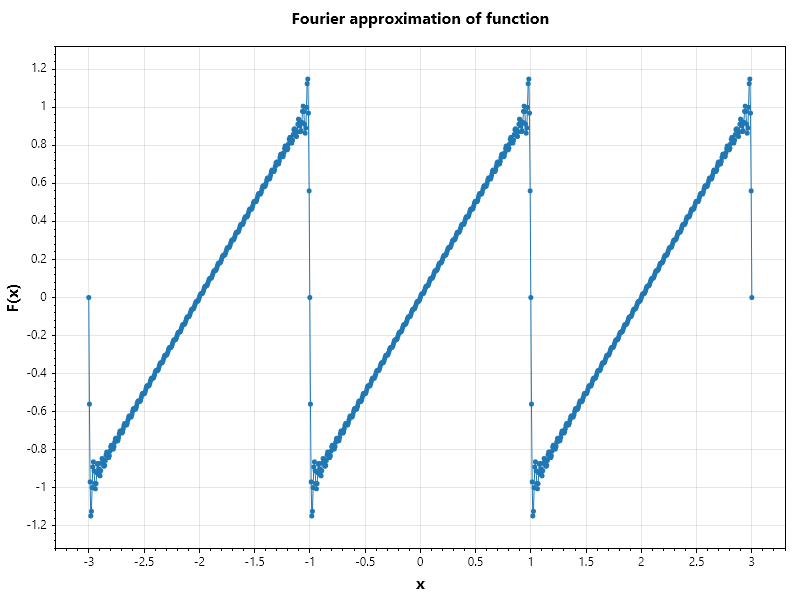


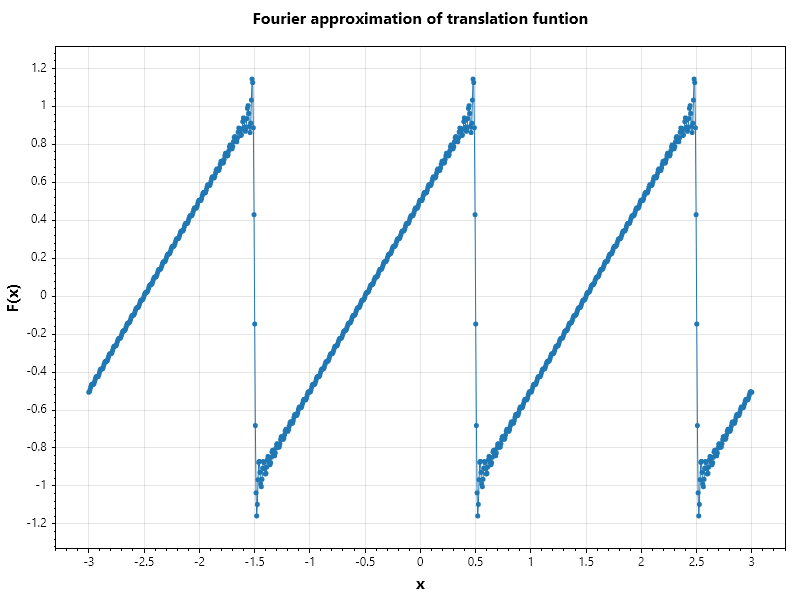


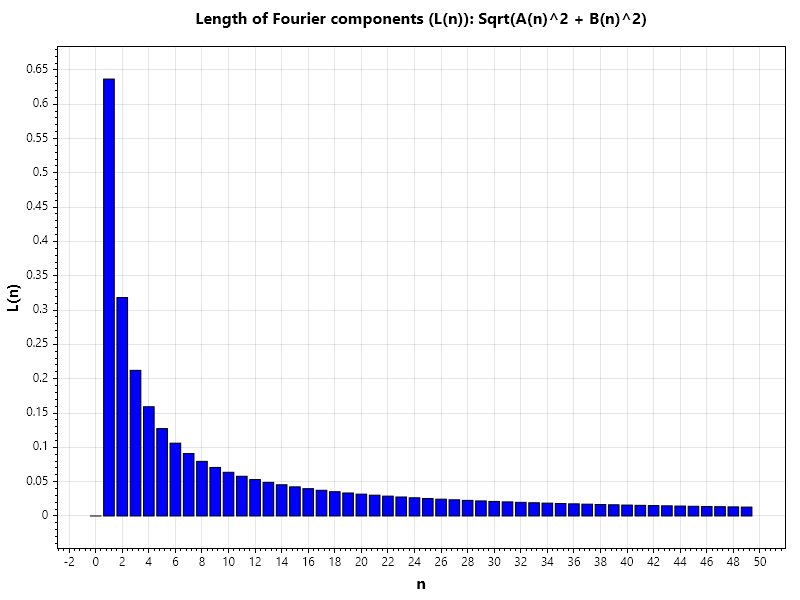


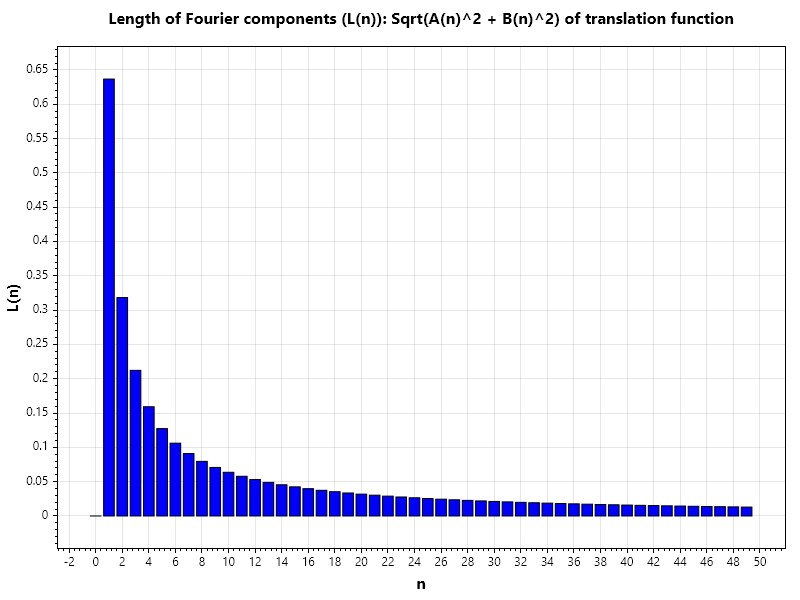


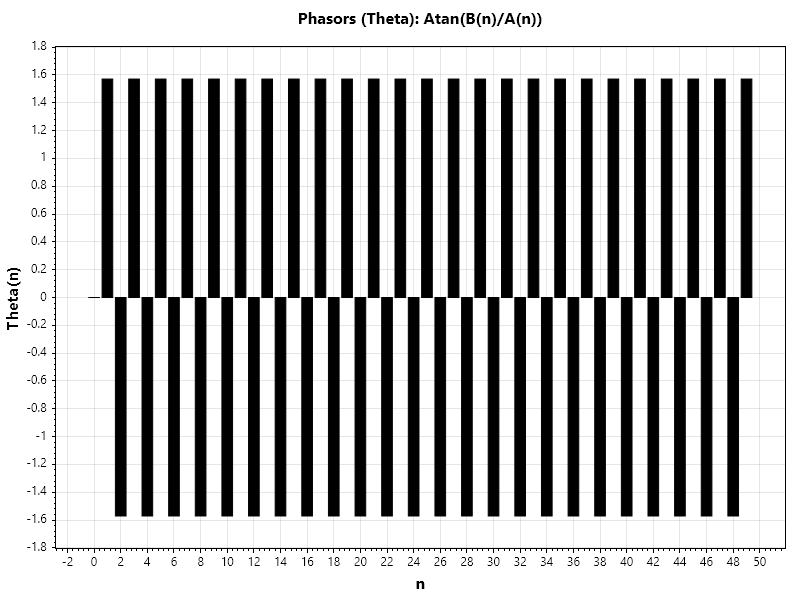


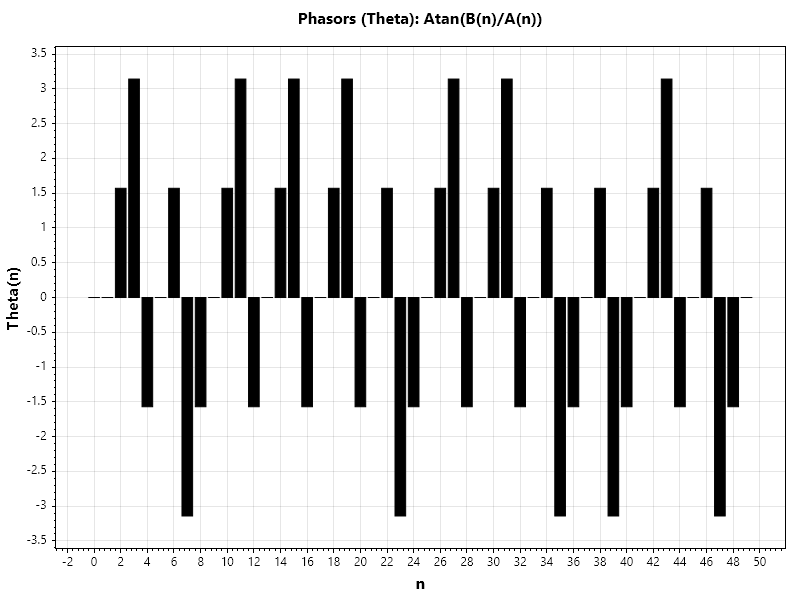

In [25]:
// for each new function repeat the code below

pointCount = 1000;   // number of points to plot 
Harmonics=50;     // number of Fourier components 

T=2;           // period of function
xStart = -3.0;       // for drawing: min x-value
xEnd = 3.0;          // for drawing: max x-value
double A0=0.0;      // average value of function
double omega = (2 * PI) / T;

// overwrite global variable because of possibly different dimensions of the arrays
double [] x= new double[pointCount];
double [] y = new double[pointCount];
double [] xn= new double[Harmonics];
double [] yf = new double[Harmonics];
double [] ypa = new double[Harmonics];
double [] ypb = new double[Harmonics];
double [] yA = new double[Harmonics];

double [] ypa_ = new double[Harmonics];
double [] ypb_ = new double[Harmonics];
double [] y_ = new double[pointCount];
double [] yf_ = new double[Harmonics];
double [] yA_ = new double[Harmonics];

// 1. Setup x-axis for all plots
step = (xEnd - xStart) / (pointCount - 1);
for (int i=0; i<pointCount; i++)
{
    x[i] = xStart + i * step;
}

for (int i=0; i<Harmonics; i++)
{
    xn[i] = i;    
}
yf[0]=0;
yA[0]=0;

double translation= 1.5;
// 2. Calculate Fourier series approximation of a function

// 2.a calculate weights and phases
for (int n=1;n<Harmonics;n++)
{
    ypa[n] = 0;
    ypb[n] = (( -2.0/(PI * (Double)n)) * Cos (1.0 * (Double)(n) * PI)); 
    yf[n]= Atan2(ypb[n], ypa[n]);
    yA[n]= Sqrt( (ypa[n]*ypa[n]) + (ypb[n]*ypb[n]) );

    double factor = ((double)n * omega * translation) % (2.0 * PI);

    ypa_[n]=Cos(factor) * ypa[n] - Sin(factor) * ypb[n];
    ypb_[n]=Sin(factor) * ypa[n] + Cos(factor) * ypb[n];
    yf_[n]= Atan2(ypb_[n], ypa_[n]);
    yA_[n]= Sqrt( (ypa_[n]*ypa_[n]) + (ypb_[n]*ypb_[n]) );

}

// 2.b calculate Fourier series approximation
for (int i = 0; i < pointCount; i++)
{
    double An = 0;
    double Bn = 0;
    double An_ = 0;
    double Bn_ = 0;
    for (int n=1;n<Harmonics;n++)
    {
         An += ypa[n] * Cos( n *omega * x[i]); 
         Bn += ypb[n] * Sin( n *omega * x[i]); 
         An_ += ypa_[n] * Cos( n *omega  * x[i]); 
         Bn_ += ypb_[n] * Sin( n *omega  * x[i]);
    }
    y[i]=  A0 + An + Bn; 
    y_[i]=  A0 + An_ + Bn_;
}


// 3. Plot with ScottPlot
ScottPlot.Plot plt = new ();
var scatter = plt.Add.Scatter(x, y);
plt.Title("Fourier approximation of function");
plt.XLabel("x");
plt.YLabel("F(x)");
plt.SavePng("fourier.png", 800, 600);
var bytesp = System.IO.File.ReadAllBytes("fourier.png");
display(bytesp);

ScottPlot.Plot plt_ = new ();
var scatter_ = plt_.Add.Scatter(x, y_);
plt_.Title("Fourier approximation of translation funtion");
plt_.XLabel("x");
plt_.YLabel("F(x)");
plt_.SavePng("fourier_.png", 800, 600);
var bytesp_ = System.IO.File.ReadAllBytes("fourier_.png");
display(bytesp_);

// 3. Plot with ScottPlot
ScottPlot.Plot plt3 = new ();
var bars3 = plt3.Add.Bars(xn, yA);
bars3.Color = ScottPlot.Colors.Blue;
plt3.Title("Length of Fourier components (L(n)): Sqrt(A(n)^2 + B(n)^2)");
plt3.XLabel("n");
plt3.YLabel("L(n)");
plt3.SavePng("Lengths.png", 800, 600);
var bytesw = System.IO.File.ReadAllBytes("Lengths.png");
display(bytesw);

ScottPlot.Plot plt3_ = new ();
var bars3_ = plt3_.Add.Bars(xn, yA_);
bars3_.Color = ScottPlot.Colors.Blue;
plt3_.Title("Length of Fourier components (L(n)): Sqrt(A(n)^2 + B(n)^2) of translation function");
plt3_.XLabel("n");
plt3_.YLabel("L(n)");
plt3_.SavePng("Lengths_.png", 800, 600);
var bytesw_ = System.IO.File.ReadAllBytes("Lengths_.png");
display(bytesw_);

ScottPlot.Plot plt2 = new ();
var bars2 = plt2.Add.Bars(xn, yf);
bars2.Color = ScottPlot.Colors.Black;
plt2.Title("Phasors (Theta): Atan(B(n)/A(n))");
plt2.XLabel("n");
plt2.YLabel("Theta(n)");
plt2.SavePng("phasors.png", 800, 600);
var bytesp2 = System.IO.File.ReadAllBytes("phasors.png");
display(bytesp2);

ScottPlot.Plot plt2_ = new ();
var bars2_ = plt2_.Add.Bars(xn, yf_);
bars2_.Color = ScottPlot.Colors.Black;
plt2_.Title("Phasors (Theta): Atan(B(n)/A(n))");
plt2_.XLabel("n");
plt2_.YLabel("Theta(n)");
plt2_.SavePng("phasors_.png", 800, 600);
var bytesp2_ = System.IO.File.ReadAllBytes("phasors_.png");
display(bytesp2_);

n=1 : ypa=0 , ypb=3.183098861837907  => ypa_=-3.183098861837907 , ypb_=1.949085916259688E-16 
n=2 : ypa=0 , ypb=1.5915494309189535  => ypa_=-1.949085916259688E-16 , ypb_=-1.5915494309189535 
n=3 : ypa=0 , ypb=1.0610329539459689  => ypa_=1.0610329539459689 , ypb_=-1.9490859162596874E-16 
n=4 : ypa=0 , ypb=0.7957747154594768  => ypa_=0 , ypb_=0.7957747154594768 
n=5 : ypa=0 , ypb=0.6366197723675814  => ypa_=-0.6366197723675814 , ypb_=3.8981718325193755E-17 
n=6 : ypa=0 , ypb=0.5305164769729844  => ypa_=-6.496953054198959E-17 , ypb_=-0.5305164769729844 
n=7 : ypa=0 , ypb=0.4547284088339867  => ypa_=0.4547284088339867 , ypb_=-8.353225355398662E-17 
n=8 : ypa=0 , ypb=0.3978873577297384  => ypa_=0 , ypb_=0.3978873577297384 
n=9 : ypa=0 , ypb=0.35367765131532297  => ypa_=-0.35367765131532297 , ypb_=2.16565101806632E-17 
n=500 : ypa=0 , ypb=0.006366197723675814  => ypa_=3.1820115702093124E-16 , ypb_=0.006366197723675814 
n=1000 : ypa=0 , ypb=0.003183098861837907  => ypa_=3.1742152265442737E-16


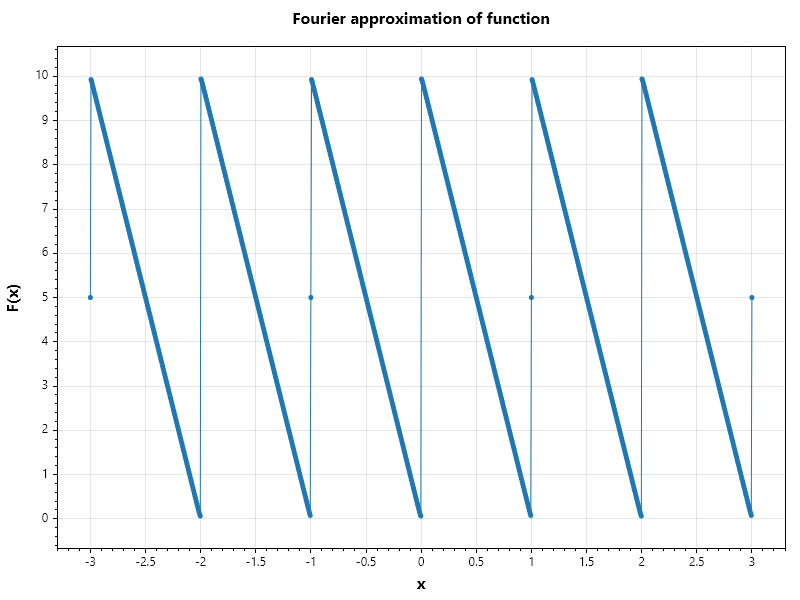


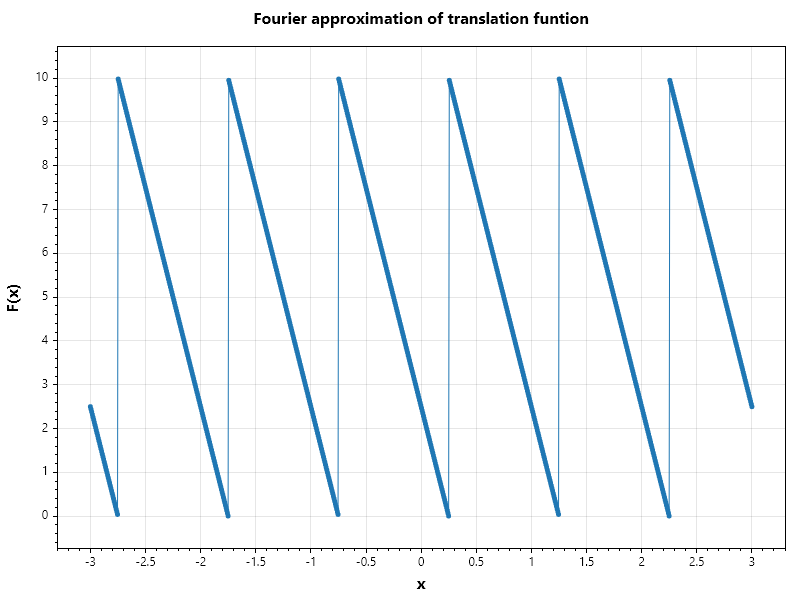


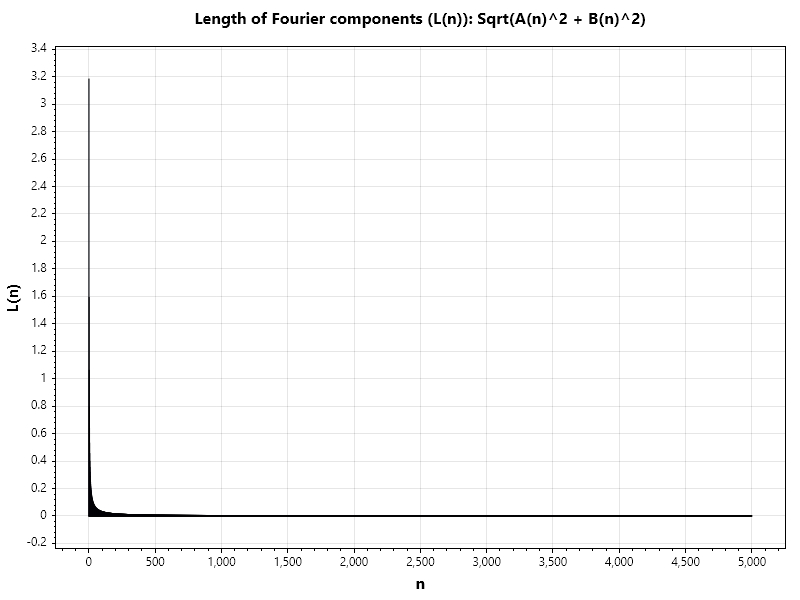


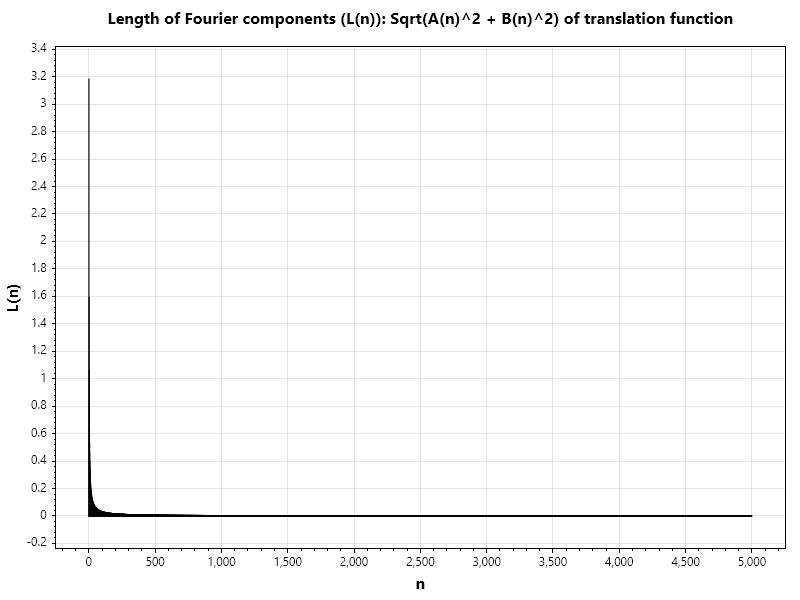


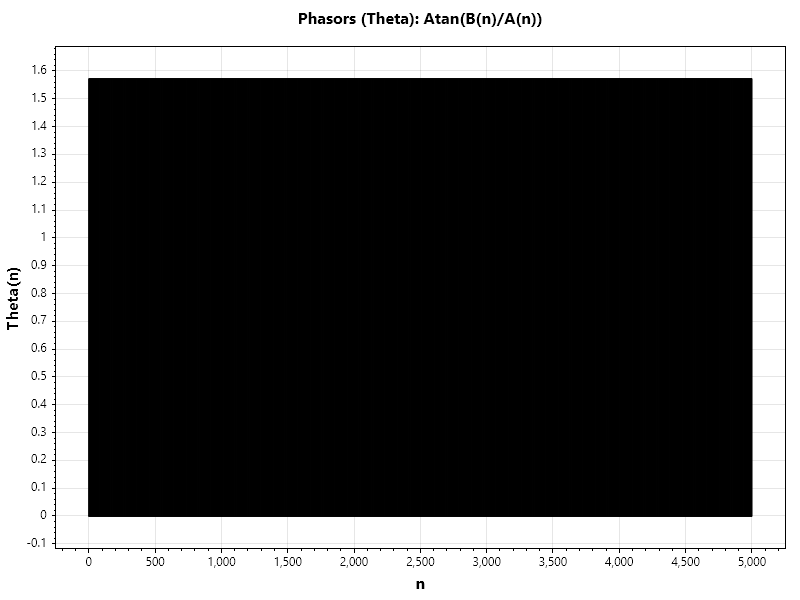


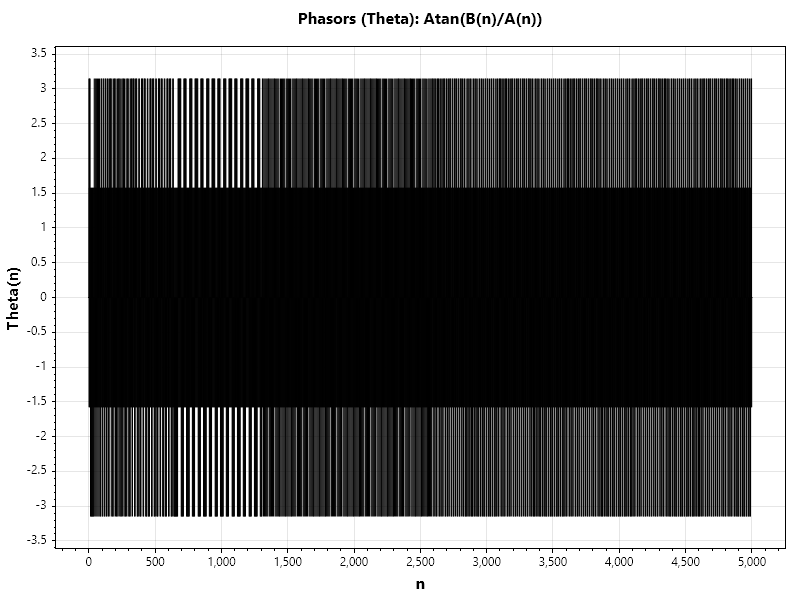

In [26]:
// for each new function repeat the code below

pointCount = 1000;   // number of points to plot 
Harmonics=5000;     // number of Fourier components 

T=1;           // period of function
xStart = -3.0;       // for drawing: min x-value
xEnd = 3.0;          // for drawing: max x-value
double A0=5.0;      // average value of function
double omega = (2 * PI) / T;

// overwrite global variable because of possibly different dimensions of the arrays
double [] x= new double[pointCount];
double [] y = new double[pointCount];
double [] xn= new double[Harmonics];
double [] yf = new double[Harmonics];
double [] ypa = new double[Harmonics];
double [] ypb = new double[Harmonics];
double [] yA = new double[Harmonics];

double [] ypa_ = new double[Harmonics];
double [] ypb_ = new double[Harmonics];
double [] y_ = new double[pointCount];
double [] yf_ = new double[Harmonics];
double [] yA_ = new double[Harmonics];

// 1. Setup x-axis for all plots
step = (xEnd - xStart) / (pointCount - 1);
for (int i=0; i<pointCount; i++)
{
    x[i] = xStart + i * step;
}

for (int i=0; i<Harmonics; i++)
{
    xn[i] = i;    
}
yf[0]=0;
yA[0]=0;

double translation= 0.25;
// 2. Calculate Fourier series approximation of a function

// 2.a calculate weights and phases
for (int n=1;n<Harmonics;n++)
{
    ypa[n] = 0;
    ypb[n] = 10.0/(PI*(double) n); 
    yf[n]= Atan2(ypb[n], ypa[n]);
    yA[n]= Sqrt( (ypa[n]*ypa[n]) + (ypb[n]*ypb[n]) );

    double factor = ((double)n * omega * translation) % (2.0 * PI);

    ypa_[n]=Cos(factor) * ypa[n] - Sin(factor) * ypb[n];
    ypb_[n]=Sin(factor) * ypa[n] + Cos(factor) * ypb[n];
    yf_[n]= Atan2(ypb_[n], ypa_[n]);
    yA_[n]= Sqrt( (ypa_[n]*ypa_[n]) + (ypb_[n]*ypb_[n]) );

    if (n/10 == 0 || n % 500 ==0) // limit output to first 10 and then every 500th
    {
       Console.WriteLine($"n={n} : ypa={ypa[n]} , ypb={ypb[n]}  => ypa_={ypa_[n]} , ypb_={ypb_[n]} ");
    }
}

// 2.b calculate Fourier series approximation
for (int i = 0; i < pointCount; i++)
{
    double An = 0;
    double Bn = 0;
    double An_ = 0;
    double Bn_ = 0;
    for (int n=1;n<Harmonics;n++)
    {
         An += ypa[n] * Cos( n *omega * x[i]); 
         Bn += ypb[n] * Sin( n *omega * x[i]); 
         An_ += ypa_[n] * Cos( n *omega  * x[i]); 
         Bn_ += ypb_[n] * Sin( n *omega  * x[i]);
    }
    y[i]=  A0 + An + Bn; 
    y_[i]=  A0 + An_ + Bn_;
}


// 3. Plot with ScottPlot
ScottPlot.Plot plt = new ();
var scatter = plt.Add.Scatter(x, y);
plt.Title("Fourier approximation of function");
plt.XLabel("x");
plt.YLabel("F(x)");
plt.SavePng("fourier.png", 800, 600);
var bytesp = System.IO.File.ReadAllBytes("fourier.png");
display(bytesp);

ScottPlot.Plot plt_ = new ();
var scatter_ = plt_.Add.Scatter(x, y_);
plt_.Title("Fourier approximation of translation funtion");
plt_.XLabel("x");
plt_.YLabel("F(x)");
plt_.SavePng("fourier_.png", 800, 600);
var bytesp_ = System.IO.File.ReadAllBytes("fourier_.png");
display(bytesp_);

// 3. Plot with ScottPlot
ScottPlot.Plot plt3 = new ();
var bars3 = plt3.Add.Bars(xn, yA);
bars3.Color = ScottPlot.Colors.Blue;
plt3.Title("Length of Fourier components (L(n)): Sqrt(A(n)^2 + B(n)^2)");
plt3.XLabel("n");
plt3.YLabel("L(n)");
plt3.SavePng("Lengths.png", 800, 600);
var bytesw = System.IO.File.ReadAllBytes("Lengths.png");
display(bytesw);

ScottPlot.Plot plt3_ = new ();
var bars3_ = plt3_.Add.Bars(xn, yA_);
bars3_.Color = ScottPlot.Colors.Blue;
plt3_.Title("Length of Fourier components (L(n)): Sqrt(A(n)^2 + B(n)^2) of translation function");
plt3_.XLabel("n");
plt3_.YLabel("L(n)");
plt3_.SavePng("Lengths_.png", 800, 600);
var bytesw_ = System.IO.File.ReadAllBytes("Lengths_.png");
display(bytesw_);

ScottPlot.Plot plt2 = new ();
var bars2 = plt2.Add.Bars(xn, yf);
bars2.Color = ScottPlot.Colors.Black;
plt2.Title("Phasors (Theta): Atan(B(n)/A(n))");
plt2.XLabel("n");
plt2.YLabel("Theta(n)");
plt2.SavePng("phasors.png", 800, 600);
var bytesp2 = System.IO.File.ReadAllBytes("phasors.png");
display(bytesp2);

ScottPlot.Plot plt2_ = new ();
var bars2_ = plt2_.Add.Bars(xn, yf_);
bars2_.Color = ScottPlot.Colors.Black;
plt2_.Title("Phasors (Theta): Atan(B(n)/A(n))");
plt2_.XLabel("n");
plt2_.YLabel("Theta(n)");
plt2_.SavePng("phasors_.png", 800, 600);
var bytesp2_ = System.IO.File.ReadAllBytes("phasors_.png");
display(bytesp2_);

n=1 : ypa=1.999671029421097 , ypb=0  => ypa_=1.2244453627641197E-16 , ypb_=1.999671029421097 
n=2 : ypa=1.9986843124796825 , ypb=0  => ypa_=-1.9986843124796825 , ypb_=2.4476823457842716E-16 
n=3 : ypa=1.9970404334243204 , ypb=0  => ypa_=-3.668503761841405E-16 , ypb_=-1.9970404334243204 
n=4 : ypa=1.9947403655450069 , ypb=0  => ypa_=1.9947403655450069 , ypb_=0 
n=5 : ypa=1.9917854704871227 , ypb=0  => ypa_=1.2196168505101298E-16 , ypb_=1.9917854704871227 
n=6 : ypa=1.9881774972917026 , ypb=0  => ypa_=-1.9881774972917026 , ypb_=2.434815208195079E-16 
n=7 : ypa=1.9839185811627609 , ypb=0  => ypa_=-3.6443993102849E-16 , ypb_=-1.9839185811627609 
n=8 : ypa=1.9790112419626167 , ypb=0  => ypa_=1.9790112419626167 , ypb_=0 
n=9 : ypa=1.9734583824363765 , ypb=0  => ypa_=1.2083947456506107E-16 , ypb_=1.9734583824363765 
n=500 : ypa=7.796343665038752E-17 , ypb=0  => ypa_=7.796343665038752E-17 , ypb_=-3.8968402843066774E-30 
n=1000 : ypa=-7.796343665038752E-17 , ypb=0  => ypa_=-7.796343665038752E-1


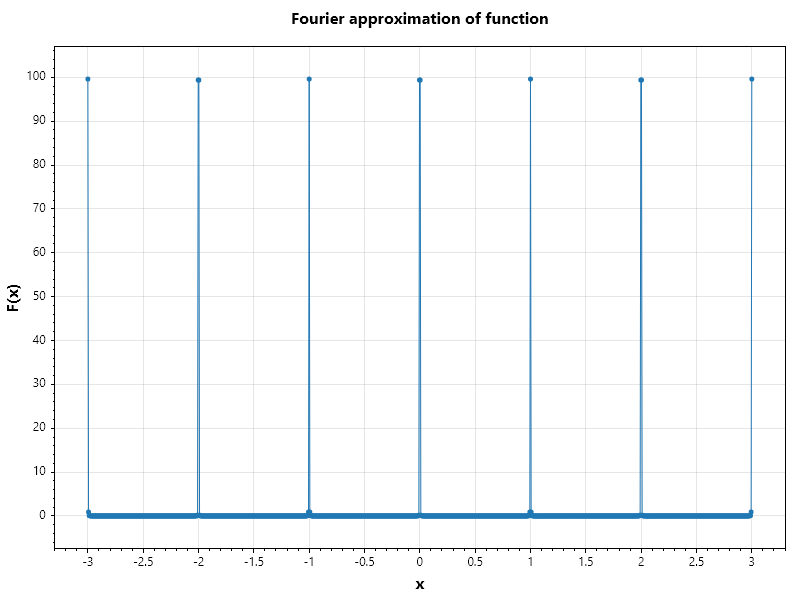


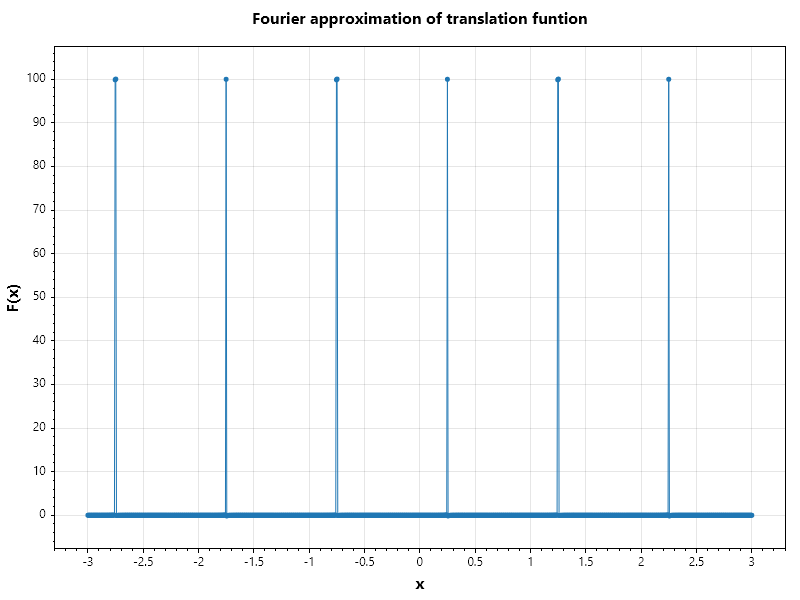


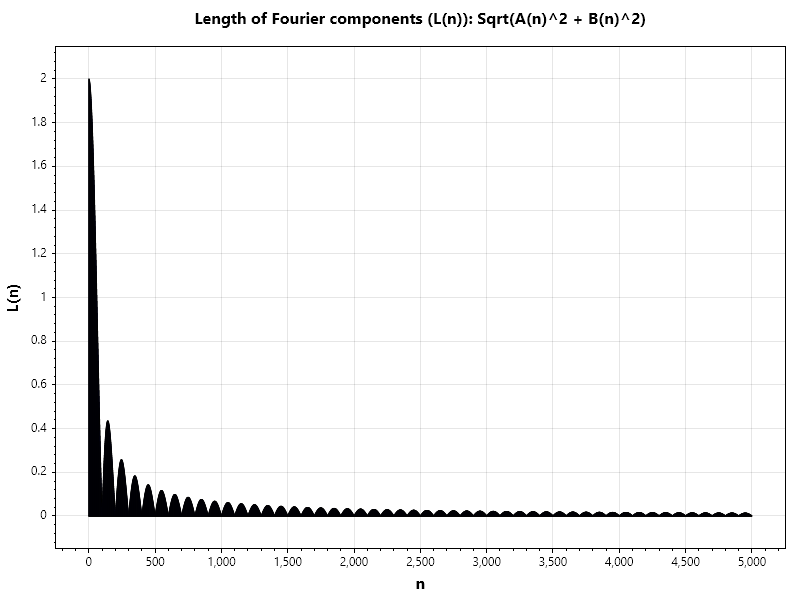


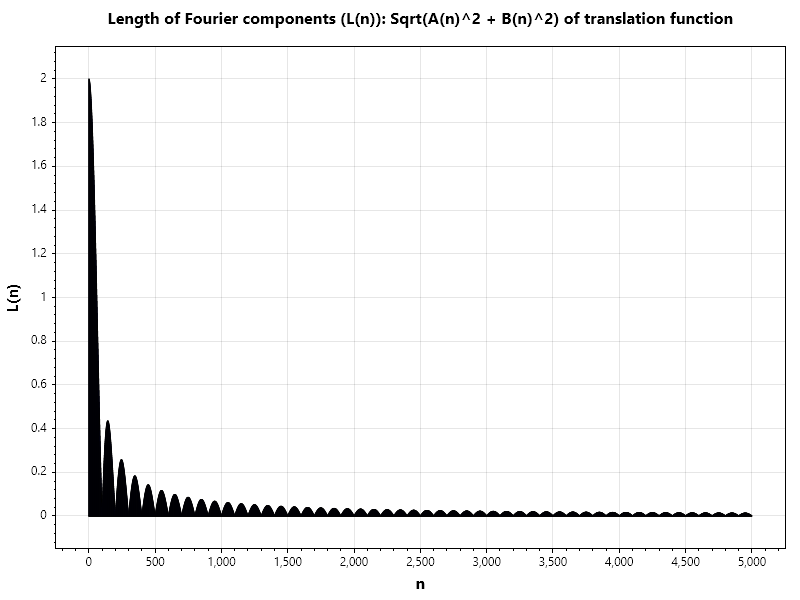


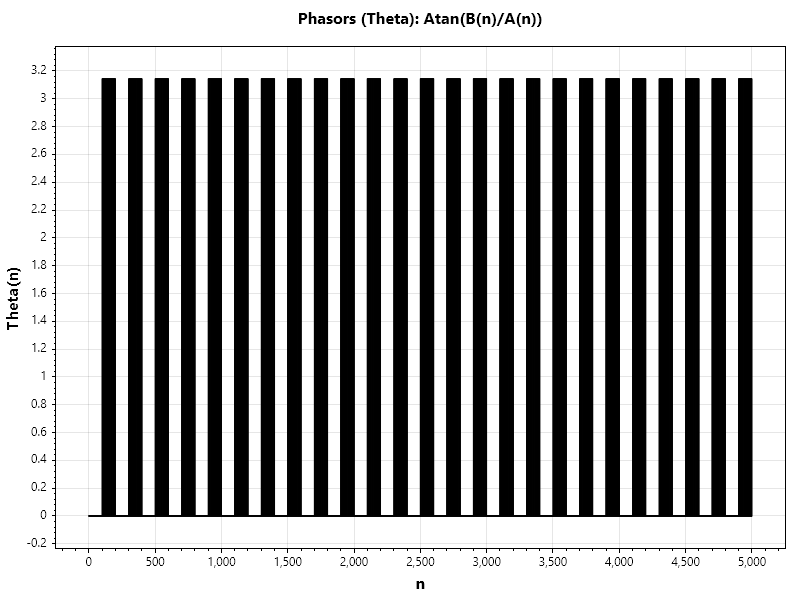


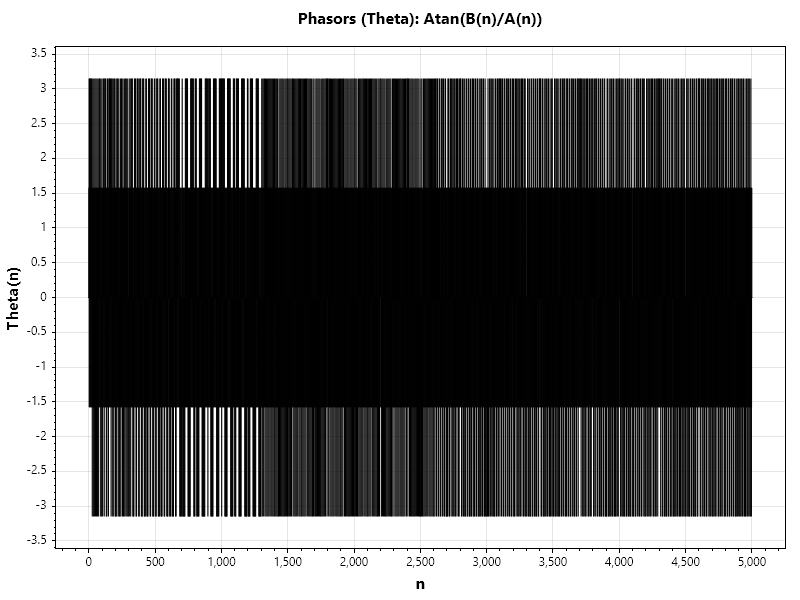

In [27]:
// for each new function repeat the code below

pointCount = 1000;   // number of points to plot 
Harmonics=5000;     // number of Fourier components 

T=1;           // period of function
xStart = -3.0;       // for drawing: min x-value
xEnd = 3.0;          // for drawing: max x-value
double A0=1.0;      // average value of function
double omega = (2 * PI) / T;

// overwrite global variable because of possibly different dimensions of the arrays
double [] x= new double[pointCount];
double [] y = new double[pointCount];
double [] xn= new double[Harmonics];
double [] yf = new double[Harmonics];
double [] ypa = new double[Harmonics];
double [] ypb = new double[Harmonics];
double [] yA = new double[Harmonics];

double [] ypa_ = new double[Harmonics];
double [] ypb_ = new double[Harmonics];
double [] y_ = new double[pointCount];
double [] yf_ = new double[Harmonics];
double [] yA_ = new double[Harmonics];

// 1. Setup x-axis for all plots
step = (xEnd - xStart) / (pointCount - 1);
for (int i=0; i<pointCount; i++)
{
    x[i] = xStart + i * step;
}

for (int i=0; i<Harmonics; i++)
{
    xn[i] = i;    
}
yf[0]=0;
yA[0]=0;

double translation= 0.25;
// 2. Calculate Fourier series approximation of a function

// 2.a calculate weights and phases
for (int n=1;n<Harmonics;n++)
{
    ypa[n] =  2 * Sin( PI * (double) n * 0.01) / (PI * (double) n * 0.01);
    ypb[n] = 0; 
    yf[n]= Atan2(ypb[n], ypa[n]);
    yA[n]= Sqrt( (ypa[n]*ypa[n]) + (ypb[n]*ypb[n]) );

    double factor = ((double)n * omega * translation) % (2.0 * PI);

    ypa_[n]=Cos(factor) * ypa[n] - Sin(factor) * ypb[n];
    ypb_[n]=Sin(factor) * ypa[n] + Cos(factor) * ypb[n];
    yf_[n]= Atan2(ypb_[n], ypa_[n]);
    yA_[n]= Sqrt( (ypa_[n]*ypa_[n]) + (ypb_[n]*ypb_[n]) );

    if (n/10 == 0 || n % 500 ==0) // limit output to first 10 and then every 500th
    {
       Console.WriteLine($"n={n} : ypa={ypa[n]} , ypb={ypb[n]}  => ypa_={ypa_[n]} , ypb_={ypb_[n]} ");
    }
}

// 2.b calculate Fourier series approximation
for (int i = 0; i < pointCount; i++)
{
    double An = 0;
    double Bn = 0;
    double An_ = 0;
    double Bn_ = 0;
    for (int n=1;n<Harmonics;n++)
    {
         An += ypa[n] * Cos( n *omega * x[i]); 
         Bn += ypb[n] * Sin( n *omega * x[i]); 
         An_ += ypa_[n] * Cos( n *omega  * x[i]); 
         Bn_ += ypb_[n] * Sin( n *omega  * x[i]);
    }
    y[i]=  A0 + An + Bn; 
    y_[i]=  A0 + An_ + Bn_;
}


// 3. Plot with ScottPlot
ScottPlot.Plot plt = new ();
var scatter = plt.Add.Scatter(x, y);
plt.Title("Fourier approximation of function");
plt.XLabel("x");
plt.YLabel("F(x)");
plt.SavePng("fourier.png", 800, 600);
var bytesp = System.IO.File.ReadAllBytes("fourier.png");
display(bytesp);

ScottPlot.Plot plt_ = new ();
var scatter_ = plt_.Add.Scatter(x, y_);
plt_.Title("Fourier approximation of translation funtion");
plt_.XLabel("x");
plt_.YLabel("F(x)");
plt_.SavePng("fourier_.png", 800, 600);
var bytesp_ = System.IO.File.ReadAllBytes("fourier_.png");
display(bytesp_);

// 3. Plot with ScottPlot
ScottPlot.Plot plt3 = new ();
var bars3 = plt3.Add.Bars(xn, yA);
bars3.Color = ScottPlot.Colors.Blue;
plt3.Title("Length of Fourier components (L(n)): Sqrt(A(n)^2 + B(n)^2)");
plt3.XLabel("n");
plt3.YLabel("L(n)");
plt3.SavePng("Lengths.png", 800, 600);
var bytesw = System.IO.File.ReadAllBytes("Lengths.png");
display(bytesw);

ScottPlot.Plot plt3_ = new ();
var bars3_ = plt3_.Add.Bars(xn, yA_);
bars3_.Color = ScottPlot.Colors.Blue;
plt3_.Title("Length of Fourier components (L(n)): Sqrt(A(n)^2 + B(n)^2) of translation function");
plt3_.XLabel("n");
plt3_.YLabel("L(n)");
plt3_.SavePng("Lengths_.png", 800, 600);
var bytesw_ = System.IO.File.ReadAllBytes("Lengths_.png");
display(bytesw_);

ScottPlot.Plot plt2 = new ();
var bars2 = plt2.Add.Bars(xn, yf);
bars2.Color = ScottPlot.Colors.Black;
plt2.Title("Phasors (Theta): Atan(B(n)/A(n))");
plt2.XLabel("n");
plt2.YLabel("Theta(n)");
plt2.SavePng("phasors.png", 800, 600);
var bytesp2 = System.IO.File.ReadAllBytes("phasors.png");
display(bytesp2);

ScottPlot.Plot plt2_ = new ();
var bars2_ = plt2_.Add.Bars(xn, yf_);
bars2_.Color = ScottPlot.Colors.Black;
plt2_.Title("Phasors (Theta): Atan(B(n)/A(n))");
plt2_.XLabel("n");
plt2_.YLabel("Theta(n)");
plt2_.SavePng("phasors_.png", 800, 600);
var bytesp2_ = System.IO.File.ReadAllBytes("phasors_.png");
display(bytesp2_);

n=1 : ypa=4.10350793751468 , ypb=0  => ypa_=3.5537421185188 , ypb_=2.0517539687573394 
n=2 : ypa=1.0258769843786704 , ypb=0  => ypa_=0.5129384921893353 , ypb_=0.8884355296297002 
n=3 : ypa=0 , ypb=0  => ypa_=0 , ypb_=0 
n=4 : ypa=0.25646924609466737 , ypb=0  => ypa_=-0.12823462304733363 , ypb_=0.22210888240742488 
n=5 : ypa=0.16414031750058736 , ypb=0  => ypa_=-0.1421496847407521 , ypb_=0.08207015875029373 
n=6 : ypa=0 , ypb=0  => ypa_=-0 , ypb_=0 
n=7 : ypa=0.08374505994927914 , ypb=0  => ypa_=-0.0725253493575265 , ypb_=-0.04187252997463955 
n=8 : ypa=0.06411731152366694 , ypb=0  => ypa_=-0.0320586557618335 , ypb_=-0.05552722060185629 
n=9 : ypa=0 , ypb=0  => ypa_=0 , ypb_=-0 
n=500 : ypa=1.641403175005902E-05 , ypb=0  => ypa_=-8.207015875029479E-06 , ypb_=-1.4214968474075475E-05 
n=1000 : ypa=4.103507937514533E-06 , ypb=0  => ypa_=-2.051753968757283E-06 , ypb_=3.5537421185186625E-06 
n=1500 : ypa=0 , ypb=0  => ypa_=0 , ypb_=0 
n=2000 : ypa=1.0258769843787444E-06 , ypb=0  => ypa_=-5.1


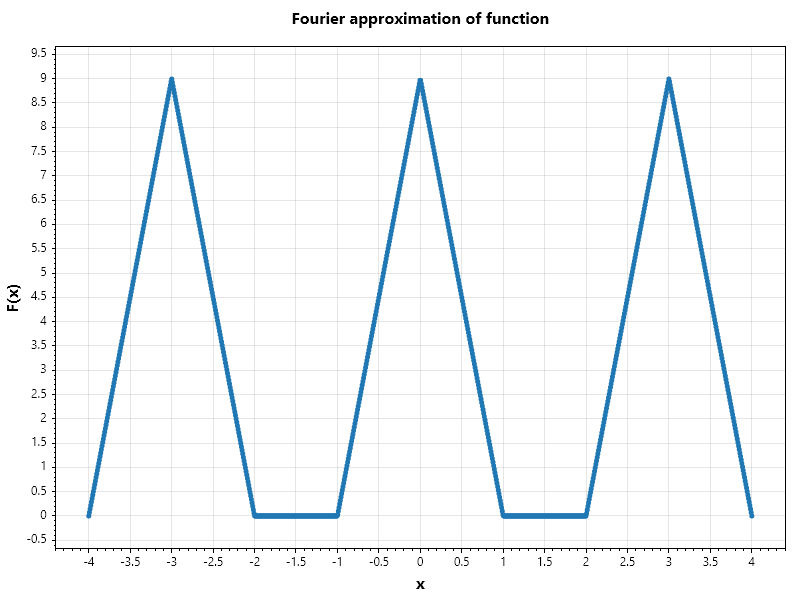


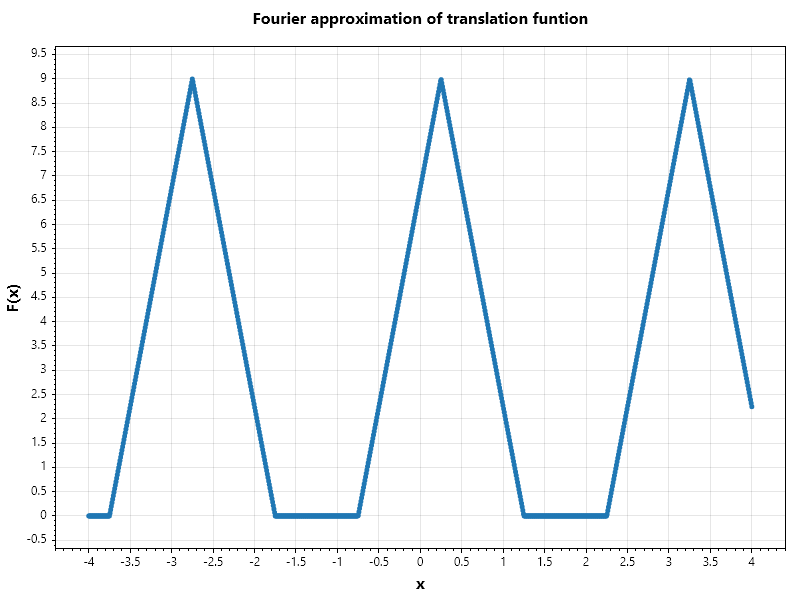


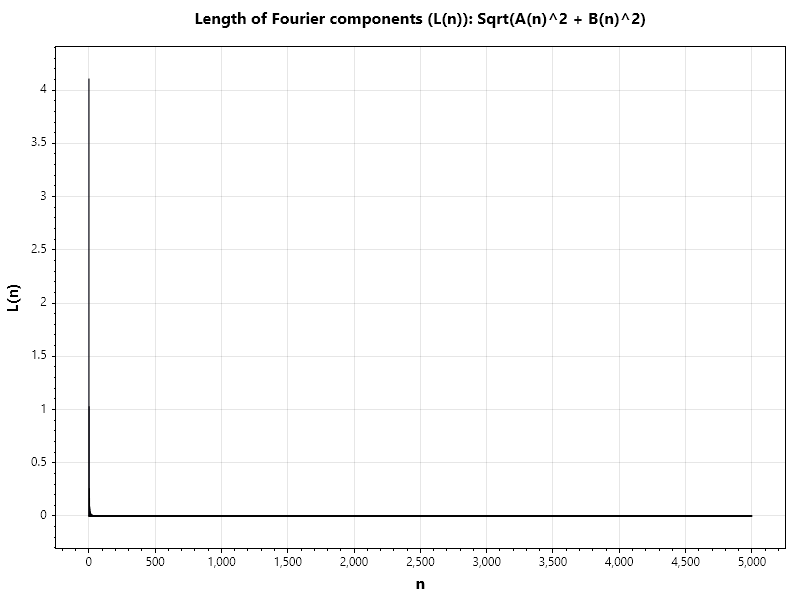


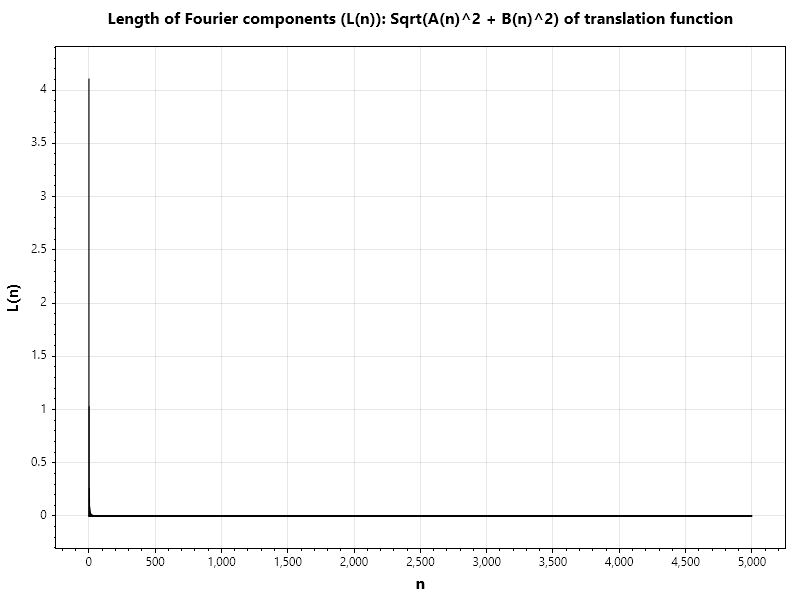


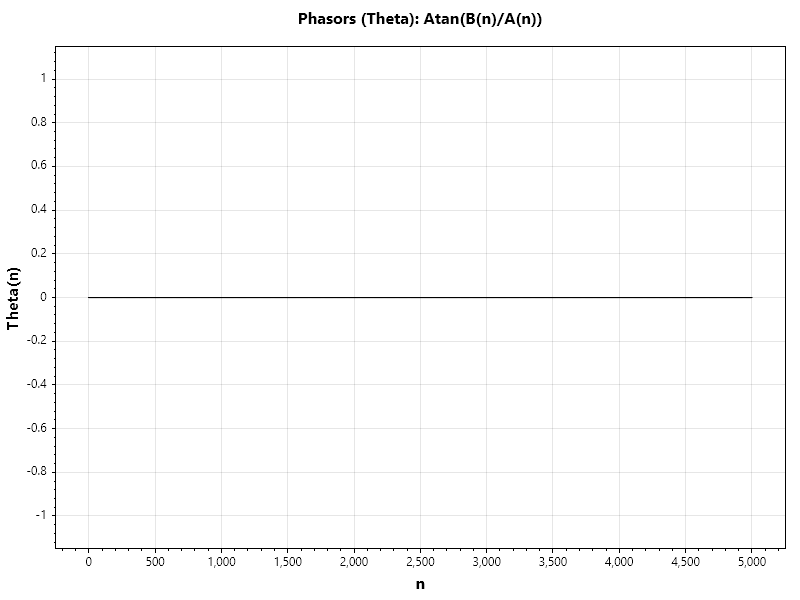


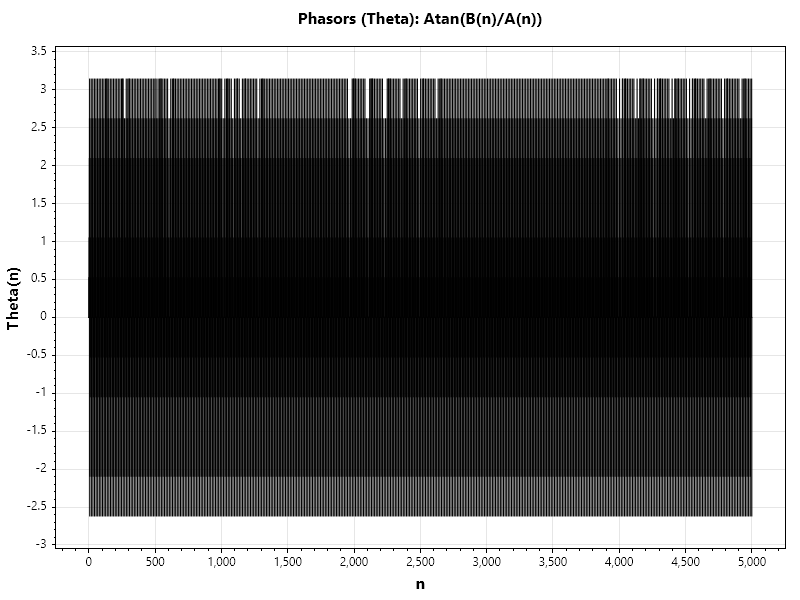

In [28]:
// for each new function repeat the code below

pointCount = 1000;   // number of points to plot 
Harmonics=5000;     // number of Fourier components 

        // period of function
xStart = -4.0;       // for drawing: min x-value
xEnd = 4.0;          // for drawing: max x-value
double A0=3;      // average value of function
double omega = (2.0 * PI)/3.0;

// overwrite global variable because of possibly different dimensions of the arrays
double [] x= new double[pointCount];
double [] y = new double[pointCount];
double [] xn= new double[Harmonics];
double [] yf = new double[Harmonics];
double [] ypa = new double[Harmonics];
double [] ypb = new double[Harmonics];
double [] yA = new double[Harmonics];

double [] ypa_ = new double[Harmonics];
double [] ypb_ = new double[Harmonics];
double [] y_ = new double[pointCount];
double [] yf_ = new double[Harmonics];
double [] yA_ = new double[Harmonics];

// 1. Setup x-axis for all plots
step = (xEnd - xStart) / (pointCount - 1);
for (int i=0; i<pointCount; i++)
{
    x[i] = xStart + i * step;
}

for (int i=0; i<Harmonics; i++)
{
    xn[i] = i;    
}
yf[0]=0;
yA[0]=0;

double translation= 0.25;
// 2. Calculate Fourier series approximation of a function

// 2.a calculate weights and phases
for (int n=1;n<Harmonics;n++)
{
    double A=9.0;
    double temp = (2.0 * A) / (3); 
    double omega = (2.0 * PI)/3.0;
    ypa[n] = 2*((3.0 * A) /( Pow((double) n,2) * ( Pow(PI,2)) * 2.0 ) * (1-Cos(omega * (double)n)));
    ypb[n] = 0; 
    yf[n]= Atan2(ypb[n], ypa[n]);
    yA[n]= Sqrt( (ypa[n]*ypa[n]) + (ypb[n]*ypb[n]) );

    double factor = ((double)n * omega * translation) % (2.0 * PI);

    ypa_[n]=Cos(factor) * ypa[n] - Sin(factor) * ypb[n];
    ypb_[n]=Sin(factor) * ypa[n] + Cos(factor) * ypb[n];
    yf_[n]= Atan2(ypb_[n], ypa_[n]);
    yA_[n]= Sqrt( (ypa_[n]*ypa_[n]) + (ypb_[n]*ypb_[n]) );

    if (n/10 == 0 || n % 500 ==0) // limit output to first 10 and then every 500th
    {
       Console.WriteLine($"n={n} : ypa={ypa[n]} , ypb={ypb[n]}  => ypa_={ypa_[n]} , ypb_={ypb_[n]} ");
    }
}

// 2.b calculate Fourier series approximation
for (int i = 0; i < pointCount; i++)
{
    double An = 0;
    double Bn = 0;
    double An_ = 0;
    double Bn_ = 0;
    for (int n=1;n<Harmonics;n++)
    {
         An += ypa[n] * Cos( n *omega * x[i]); 
         Bn += ypb[n] * Sin( n *omega * x[i]); 
         An_ += ypa_[n] * Cos( n *omega  * x[i]); 
         Bn_ += ypb_[n] * Sin( n *omega  * x[i]);
    }
    y[i]=  A0 + An + Bn; 
    y_[i]=  A0 + An_ + Bn_;
}


// 3. Plot with ScottPlot
ScottPlot.Plot plt = new ();
var scatter = plt.Add.Scatter(x, y);
plt.Title("Fourier approximation of function");
plt.XLabel("x");
plt.YLabel("F(x)");
plt.SavePng("fourier.png", 800, 600);
var bytesp = System.IO.File.ReadAllBytes("fourier.png");
display(bytesp);

ScottPlot.Plot plt_ = new ();
var scatter_ = plt_.Add.Scatter(x, y_);
plt_.Title("Fourier approximation of translation funtion");
plt_.XLabel("x");
plt_.YLabel("F(x)");
plt_.SavePng("fourier_.png", 800, 600);
var bytesp_ = System.IO.File.ReadAllBytes("fourier_.png");
display(bytesp_);

// 3. Plot with ScottPlot
ScottPlot.Plot plt3 = new ();
var bars3 = plt3.Add.Bars(xn, yA);
bars3.Color = ScottPlot.Colors.Blue;
plt3.Title("Length of Fourier components (L(n)): Sqrt(A(n)^2 + B(n)^2)");
plt3.XLabel("n");
plt3.YLabel("L(n)");
plt3.SavePng("Lengths.png", 800, 600);
var bytesw = System.IO.File.ReadAllBytes("Lengths.png");
display(bytesw);

ScottPlot.Plot plt3_ = new ();
var bars3_ = plt3_.Add.Bars(xn, yA_);
bars3_.Color = ScottPlot.Colors.Blue;
plt3_.Title("Length of Fourier components (L(n)): Sqrt(A(n)^2 + B(n)^2) of translation function");
plt3_.XLabel("n");
plt3_.YLabel("L(n)");
plt3_.SavePng("Lengths_.png", 800, 600);
var bytesw_ = System.IO.File.ReadAllBytes("Lengths_.png");
display(bytesw_);

ScottPlot.Plot plt2 = new ();
var bars2 = plt2.Add.Bars(xn, yf);
bars2.Color = ScottPlot.Colors.Black;
plt2.Title("Phasors (Theta): Atan(B(n)/A(n))");
plt2.XLabel("n");
plt2.YLabel("Theta(n)");
plt2.SavePng("phasors.png", 800, 600);
var bytesp2 = System.IO.File.ReadAllBytes("phasors.png");
display(bytesp2);

ScottPlot.Plot plt2_ = new ();
var bars2_ = plt2_.Add.Bars(xn, yf_);
bars2_.Color = ScottPlot.Colors.Black;
plt2_.Title("Phasors (Theta): Atan(B(n)/A(n))");
plt2_.XLabel("n");
plt2_.YLabel("Theta(n)");
plt2_.SavePng("phasors_.png", 800, 600);
var bytesp2_ = System.IO.File.ReadAllBytes("phasors_.png");
display(bytesp2_);